In [1]:
!pip install ppscore

     |████████████████████████████████| 51kB 5.4MB/s 
  Created wheel for ppscore: filename=ppscore-1.2.0-py2.py3-none-any.whl size=13067 sha256=969d4a7d6b4978097deebf57e18e11004c21556ce93b2f643c7ddc2574572fdb
  Stored in directory: /root/.cache/pip/wheels/50/cc/8f/d0da07e4ec4e7a4c4cf32aee9057e4d1c318de910543b4684e
Successfully built ppscore


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import ppscore as pps
import warnings
warnings.filterwarnings('ignore')
sns.set_context('paper')
sns.set(color_codes=True)

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

Loan_ID Gender Married  ... Credit_History Property_Area Loan_Status
0  LP001002   Male      No  ...            1.0         Urban           Y
1  LP001003   Male     Yes  ...            1.0         Rural           N
2  LP001005   Male     Yes  ...            1.0         Urban           Y
3  LP001006   Male     Yes  ...            1.0         Urban           Y
4  LP001008   Male      No  ...            1.0         Urban           Y

[5 rows x 13 columns]

Loan_ID              0.00
Gender               2.12
Married              0.49
Dependents           2.44
Education            0.00
Self_Employed        5.21
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           3.58
Loan_Amount_Term     2.28
Credit_History       8.14
Property_Area        0.00
Loan_Status          0.00
dtype: float64


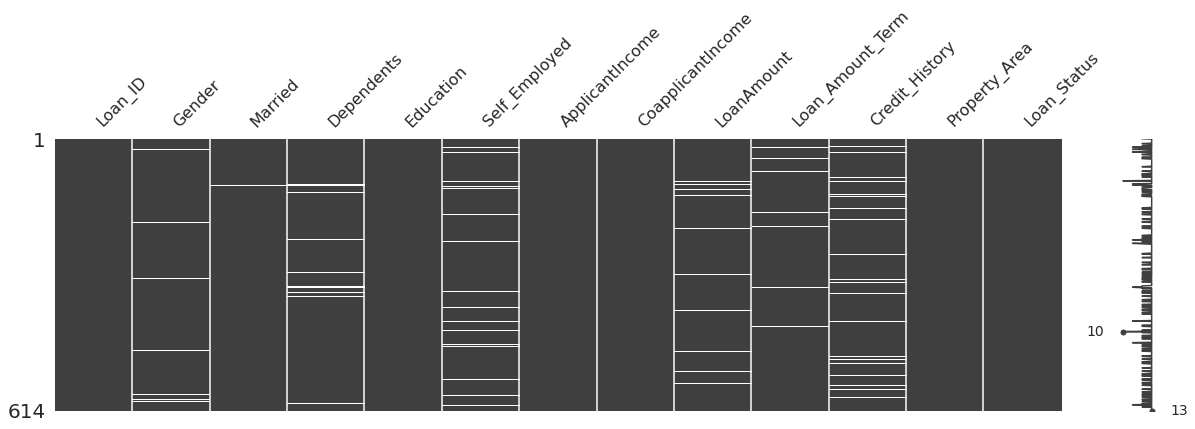

In [5]:
print(np.round(df.isnull().sum() / len(df) * 100,2))
missingno.matrix(df,figsize=(20,5))

In [6]:
df.describe()

ApplicantIncome  CoapplicantIncome  ...  Loan_Amount_Term  Credit_History
count       614.000000         614.000000  ...         600.00000      564.000000
mean       5403.459283        1621.245798  ...         342.00000        0.842199
std        6109.041673        2926.248369  ...          65.12041        0.364878
min         150.000000           0.000000  ...          12.00000        0.000000
25%        2877.500000           0.000000  ...         360.00000        1.000000
50%        3812.500000        1188.500000  ...         360.00000        1.000000
75%        5795.000000        2297.250000  ...         360.00000        1.000000
max       81000.000000       41667.000000  ...         480.00000        1.000000

[8 rows x 5 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
print(f'Length of data : {(str(len(df)))}\n')

print('Unique Elements')
for i in df.columns :
  print(f'{i} : {str(df[i].nunique())}')

Length of data : 614

Unique Elements
Loan_ID : 614
Gender : 2
Married : 2
Dependents : 4
Education : 2
Self_Employed : 2
ApplicantIncome : 505
CoapplicantIncome : 287
LoanAmount : 203
Loan_Amount_Term : 10
Credit_History : 2
Property_Area : 3
Loan_Status : 2


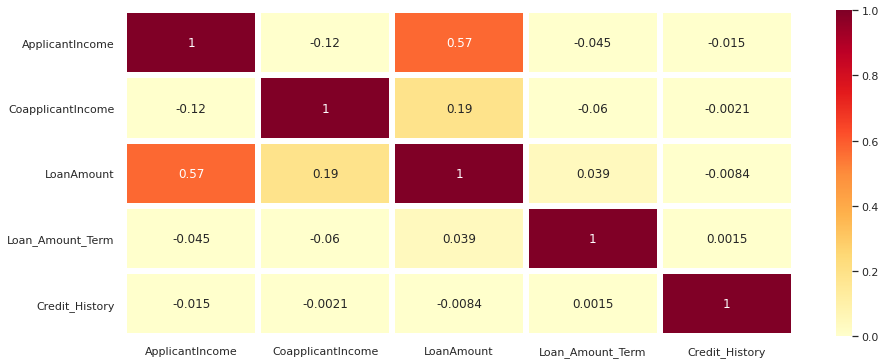

In [9]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),cmap='YlOrRd',vmin=0,vmax=1,annot=True,lw=5)

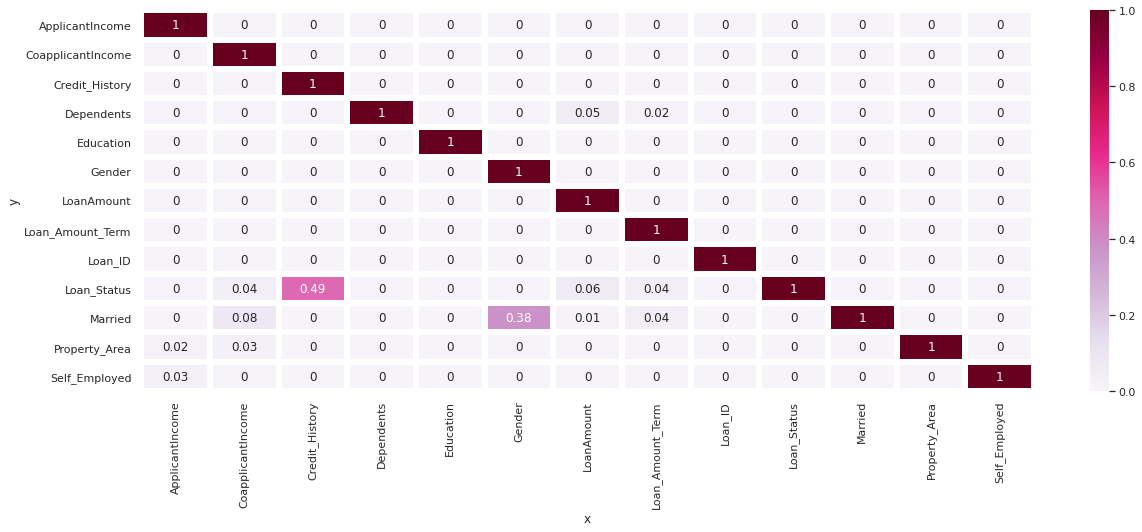

In [10]:
plt.figure(figsize=(20,7))
matrix_df = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
matrix_df = matrix_df.apply(lambda x: round(x, 2))
sns.heatmap(matrix_df,cmap='PuRd',vmin=0,vmax=1,annot=True,lw=5)

In [11]:
def cat_cols_cp(df,x):
    y = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']
    y.remove(x)
    fig,axs = plt.subplots(2,4,figsize=(20,10))
    sns.countplot(df[x],ax = axs[0][0])
    sns.countplot(df[x],hue=df[y[0]],ax = axs[0][1])
    sns.countplot(df[x],hue=df[y[1]],ax = axs[0][2])
    sns.countplot(df[x],hue=df[y[2]],ax = axs[0][3])
    sns.countplot(df[x],hue=df[y[3]],ax = axs[1][0])
    sns.countplot(df[x],hue=df[y[4]],ax = axs[1][1])
    sns.countplot(df[x],hue=df[y[5]],ax = axs[1][2])
    sns.countplot(df[x],hue=df[y[6]],ax = axs[1][3])
    plt.tight_layout()

In [12]:
def num_cols_vp(df,x):
    y = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Credit_History', 'Property_Area']
    fig,axs = plt.subplots(4,4,figsize=(24,20))
    sns.violinplot(x=df['Loan_Status'],y=df[x],inner='quartile',ax=axs[0][0])
    sns.swarmplot(x=df['Loan_Status'],y=df[x],ax=axs[0][1])
    sns.violinplot(x=df['Loan_Status'],y=df[x],hue=df[y[0]],inner='quartile',ax=axs[0][2])
    sns.swarmplot(x=df['Loan_Status'],y=df[x],hue=df[y[0]],ax=axs[0][3])
    sns.violinplot(x=df['Loan_Status'],y=df[x],hue=df[y[1]],inner='quartile',ax=axs[1][0])
    sns.swarmplot(x=df['Loan_Status'],y=df[x],hue=df[y[1]],ax=axs[1][1])
    sns.violinplot(x=df['Loan_Status'],y=df[x],hue=df[y[2]],inner='quartile',ax=axs[1][2])
    sns.swarmplot(x=df['Loan_Status'],y=df[x],hue=df[y[2]],ax=axs[1][3])
    sns.violinplot(x=df['Loan_Status'],y=df[x],hue=df[y[3]],inner='quartile',ax=axs[2][0])
    sns.swarmplot(x=df['Loan_Status'],y=df[x],hue=df[y[3]],ax=axs[2][1])
    sns.violinplot(x=df['Loan_Status'],y=df[x],hue=df[y[4]],inner='quartile',ax=axs[2][2])
    sns.swarmplot(x=df['Loan_Status'],y=df[x],hue=df[y[4]],ax=axs[2][3])
    sns.violinplot(x=df['Loan_Status'],y=df[x],hue=df[y[5]],inner='quartile',ax=axs[3][0])
    sns.swarmplot(x=df['Loan_Status'],y=df[x],hue=df[y[5]],ax=axs[3][1])
    sns.violinplot(x=df['Loan_Status'],y=df[x],hue=df[y[6]],inner='quartile',ax=axs[3][2])
    sns.swarmplot(x=df['Loan_Status'],y=df[x],hue=df[y[6]],ax=axs[3][3])
    plt.tight_layout()

In [13]:
def num_cols_rp(df,x,z,o=1):
    plt.figure(figsize=(16,7))
    sns.regplot(x=df[z],y=df[x],order=o)
    plt.tight_layout()

In [14]:
def num_cols_sp(df,x,z):
    y = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Credit_History', 'Property_Area','Loan_Status']
    fig,axs = plt.subplots(2,4,figsize=(24,10))
    sns.scatterplot(x=df[z],y=df[x],hue=df[y[0]],ax=axs[0][0],s=100)
    sns.scatterplot(x=df[z],y=df[x],hue=df[y[1]],ax=axs[0][1],s=100)
    sns.scatterplot(x=df[z],y=df[x],hue=df[y[2]],ax=axs[0][2],s=100)
    sns.scatterplot(x=df[z],y=df[x],hue=df[y[3]],ax=axs[0][3],s=100)
    sns.scatterplot(x=df[z],y=df[x],hue=df[y[4]],ax=axs[1][0],s=100)
    sns.scatterplot(x=df[z],y=df[x],hue=df[y[5]],ax=axs[1][1],s=100)
    sns.scatterplot(x=df[z],y=df[x],hue=df[y[6]],ax=axs[1][2],s=100)
    sns.scatterplot(x=df[z],y=df[x],hue=df[y[7]],ax=axs[1][3],s=100)
    plt.tight_layout()

In [15]:
def cat_cols_bp(df,x):
    fig,axs = plt.subplots(1,2,figsize=(24,7))
    sns.boxplot(y=df[x],x=df.LoanAmount,hue=df.Loan_Status,ax=axs[0])
    sns.boxplot(y=df[x],x=df.ApplicantIncome,hue=df.Loan_Status,ax=axs[1])

>***Loan_Status***

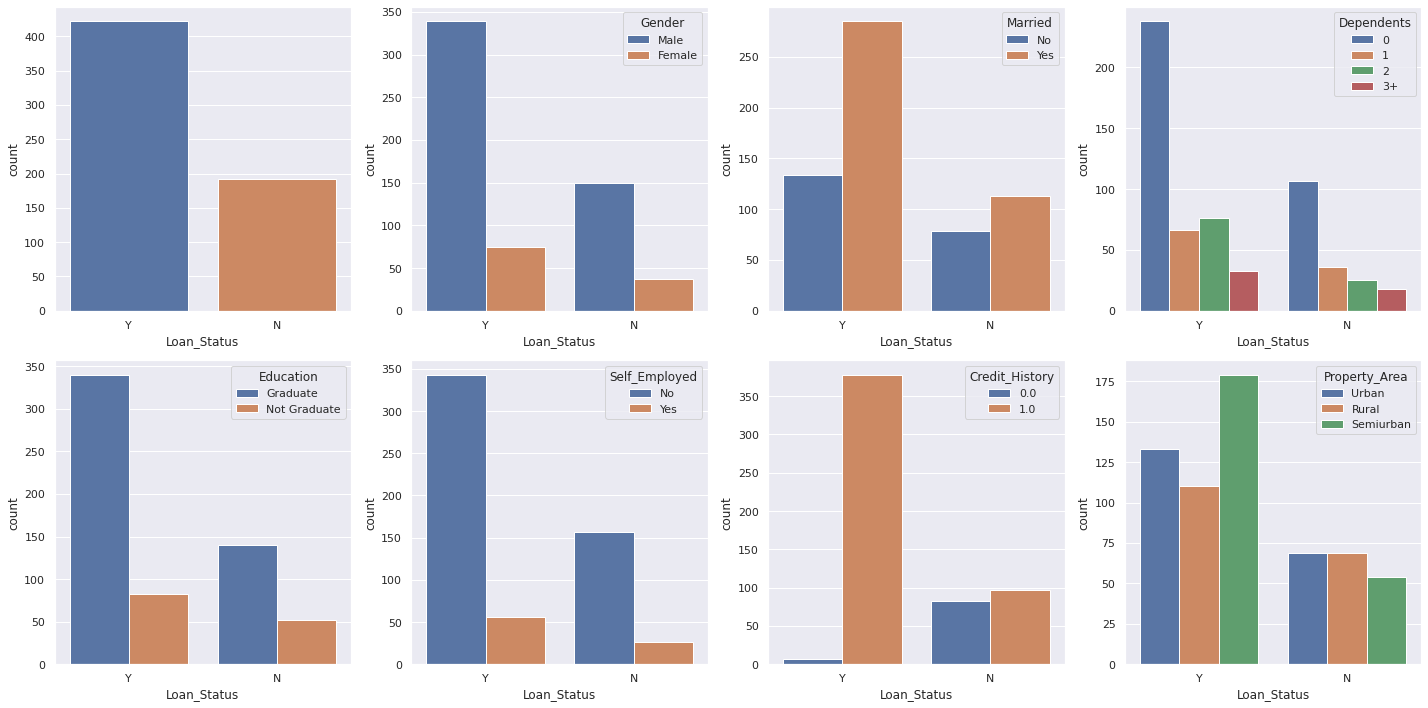

In [16]:
cat_cols_cp(df,'Loan_Status')

>***LoanAmount***

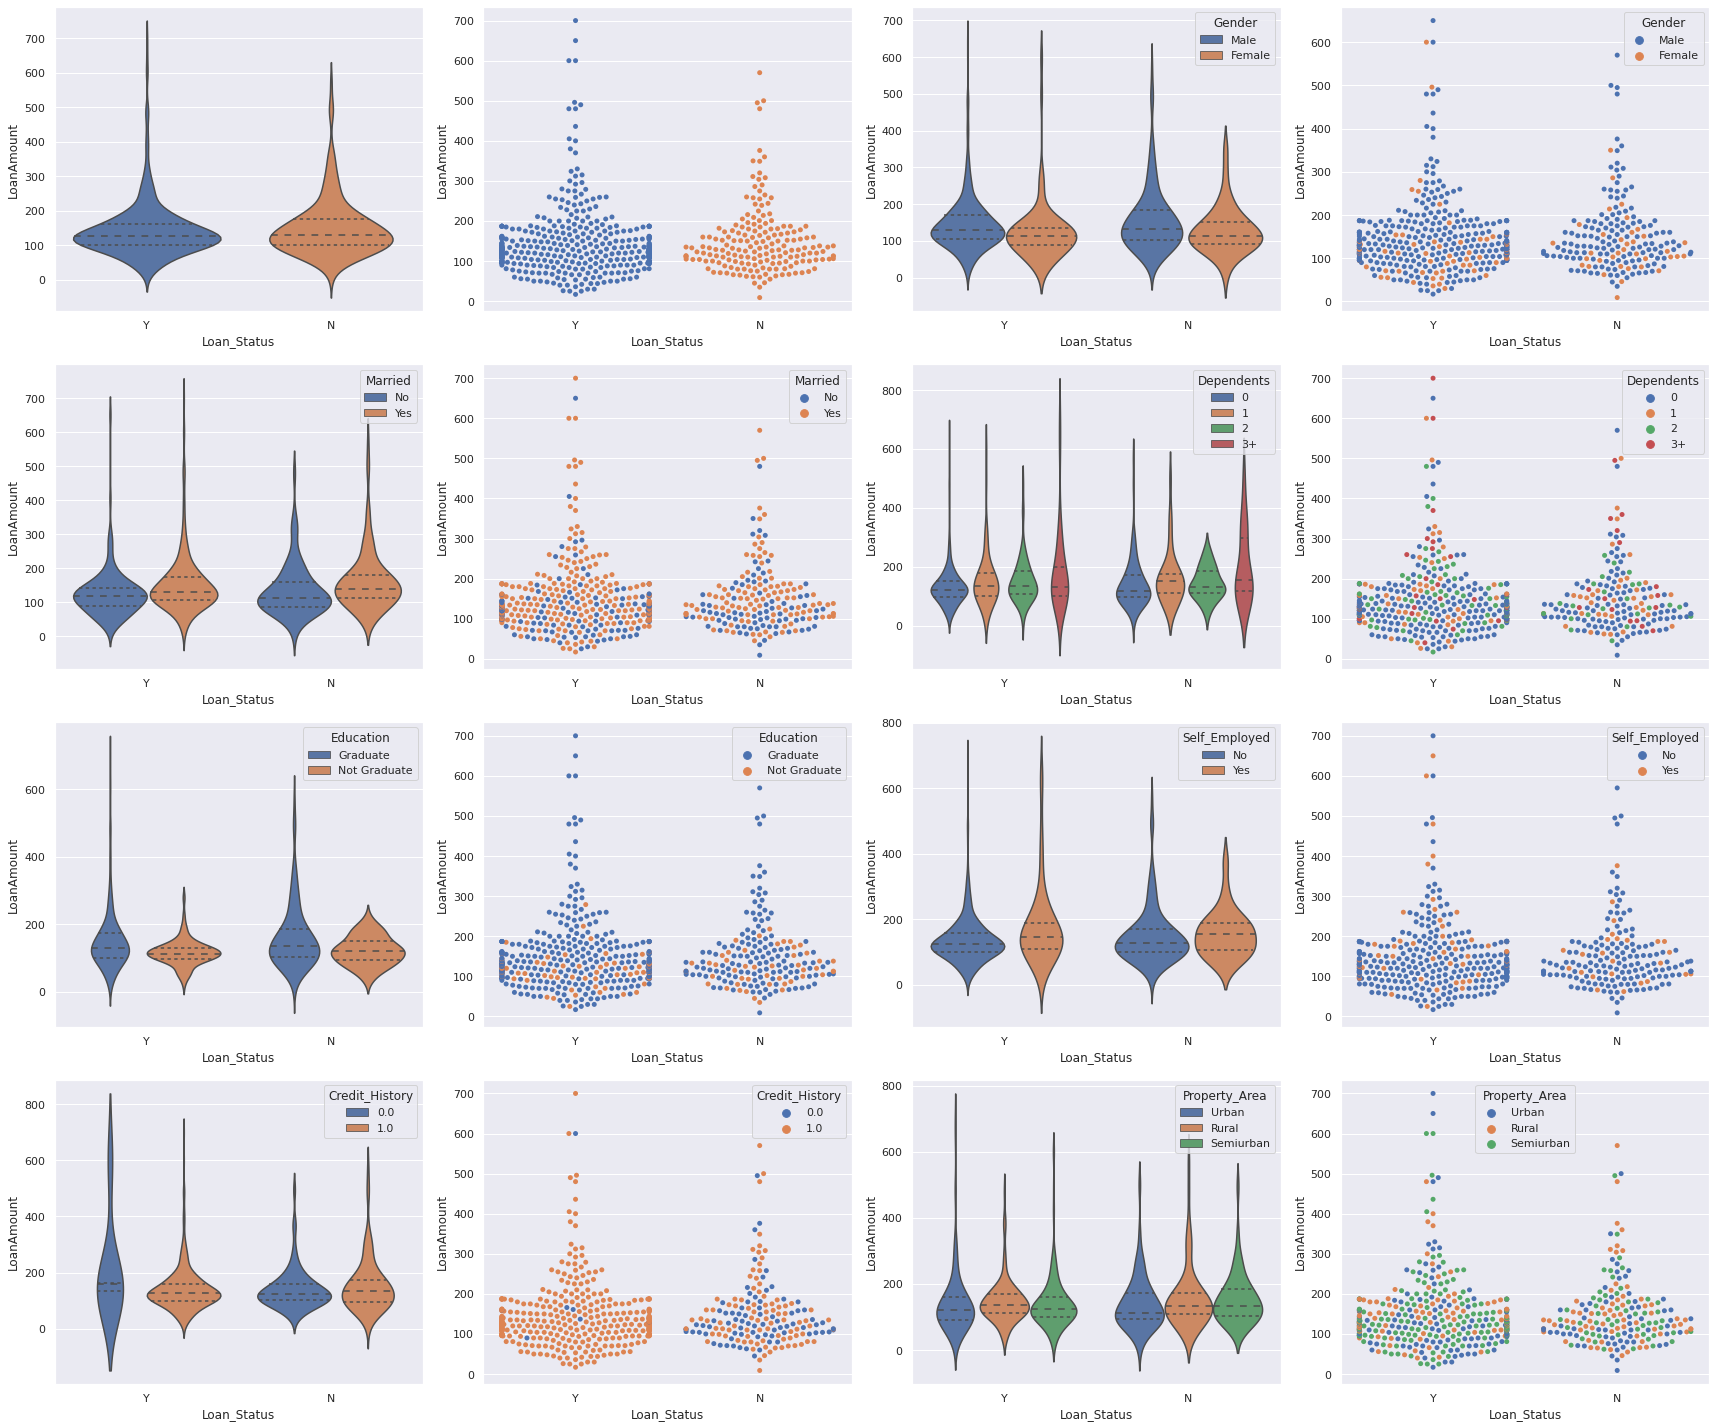

In [17]:
num_cols_vp(df,'LoanAmount')

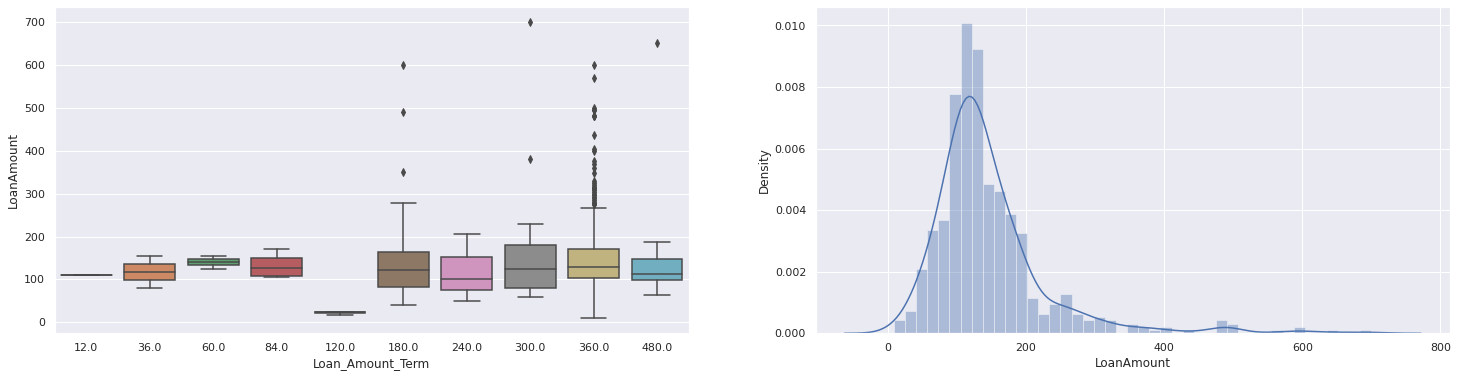

In [18]:
fig,axs = plt.subplots(1,2,figsize=(25,6))
sns.boxplot(y=df.LoanAmount,ax=axs[0],x=df.Loan_Amount_Term)
sns.distplot(df.LoanAmount,ax=axs[1])

In [19]:
df[pd.isna(df.LoanAmount)]

Loan_ID  Gender Married  ... Credit_History Property_Area Loan_Status
0    LP001002    Male      No  ...            1.0         Urban           Y
35   LP001106    Male     Yes  ...            1.0         Urban           Y
63   LP001213    Male     Yes  ...            0.0         Rural           N
81   LP001266    Male     Yes  ...            1.0     Semiurban           Y
95   LP001326    Male      No  ...            NaN         Urban           N
102  LP001350    Male     Yes  ...            1.0         Urban           Y
103  LP001356    Male     Yes  ...            1.0     Semiurban           Y
113  LP001392  Female      No  ...            1.0     Semiurban           Y
127  LP001449    Male      No  ...            1.0         Rural           Y
202  LP001682    Male     Yes  ...            1.0         Urban           N
284  LP001922    Male     Yes  ...            1.0         Rural           N
305  LP001990    Male      No  ...            1.0         Urban           N
322  LP002054    Male     Yes  ...            1.0         Rural           Y
338  LP002113  Female      No  ...            0.0         Urban           N
387  LP002243    Male     Yes  ...            0.0         Urban           N
435  LP002393  Female     NaN  ...            1.0     Semiurban           Y
437  LP002401    Male     Yes  ...            1.0         Urban           Y
479  LP002533    Male     Yes  ...            1.0         Urban           N
524  LP002697    Male      No  ...            1.0     Semiurban           N
550  LP002778    Male     Yes  ...            0.0         Rural           N
551  LP002784    Male     Yes  ...            1.0         Rural           Y
605  LP002960    Male     Yes  ...            1.0         Urban           N

[22 rows x 13 columns]

In [20]:
df.dropna().groupby(['Loan_Amount_Term','Gender'])['LoanAmount'].mean()

Loan_Amount_Term  Gender
36.0              Female    155.000000
                  Male       80.000000
60.0              Male      140.000000
84.0              Female    105.000000
                  Male      140.000000
120.0             Male       22.333333
180.0             Female    140.000000
                  Male      136.085714
240.0             Male      127.500000
300.0             Female     99.000000
                  Male      159.750000
360.0             Female    127.924051
                  Male      152.225904
480.0             Female    125.666667
                  Male      105.444444
Name: LoanAmount, dtype: float64

In [21]:
df.dropna().groupby(['Loan_Amount_Term','Self_Employed'])['LoanAmount'].mean()

Loan_Amount_Term  Self_Employed
36.0              No               117.500000
60.0              No               155.000000
                  Yes              125.000000
84.0              No               128.333333
120.0             No                21.000000
                  Yes               25.000000
180.0             No               133.843750
                  Yes              155.000000
240.0             No                50.000000
                  Yes              205.000000
300.0             No               138.666667
                  Yes              181.666667
360.0             No               143.695775
                  Yes              172.017857
480.0             No               110.500000
Name: LoanAmount, dtype: float64

In [22]:
df.dropna().groupby(['Property_Area','Education','Self_Employed'])['LoanAmount'].mean()

Property_Area  Education     Self_Employed
Rural          Graduate      No               160.885057
                             Yes              199.944444
               Not Graduate  No               114.275862
                             Yes              144.800000
Semiurban      Graduate      No               151.367647
                             Yes              160.250000
               Not Graduate  No               116.766667
                             Yes              120.600000
Urban          Graduate      No               131.878505
                             Yes              174.266667
               Not Graduate  No               112.360000
                             Yes              136.000000
Name: LoanAmount, dtype: float64

In [23]:
df.dropna().groupby(['Property_Area','Education','Self_Employed'])['LoanAmount'].median()

Property_Area  Education     Self_Employed
Rural          Graduate      No               139.0
                             Yes              153.5
               Not Graduate  No               110.0
                             Yes              138.0
Semiurban      Graduate      No               131.0
                             Yes              141.5
               Not Graduate  No               112.0
                             Yes               97.0
Urban          Graduate      No               117.0
                             Yes              187.0
               Not Graduate  No               115.0
                             Yes              125.0
Name: LoanAmount, dtype: float64

>***ApplicantIncome***

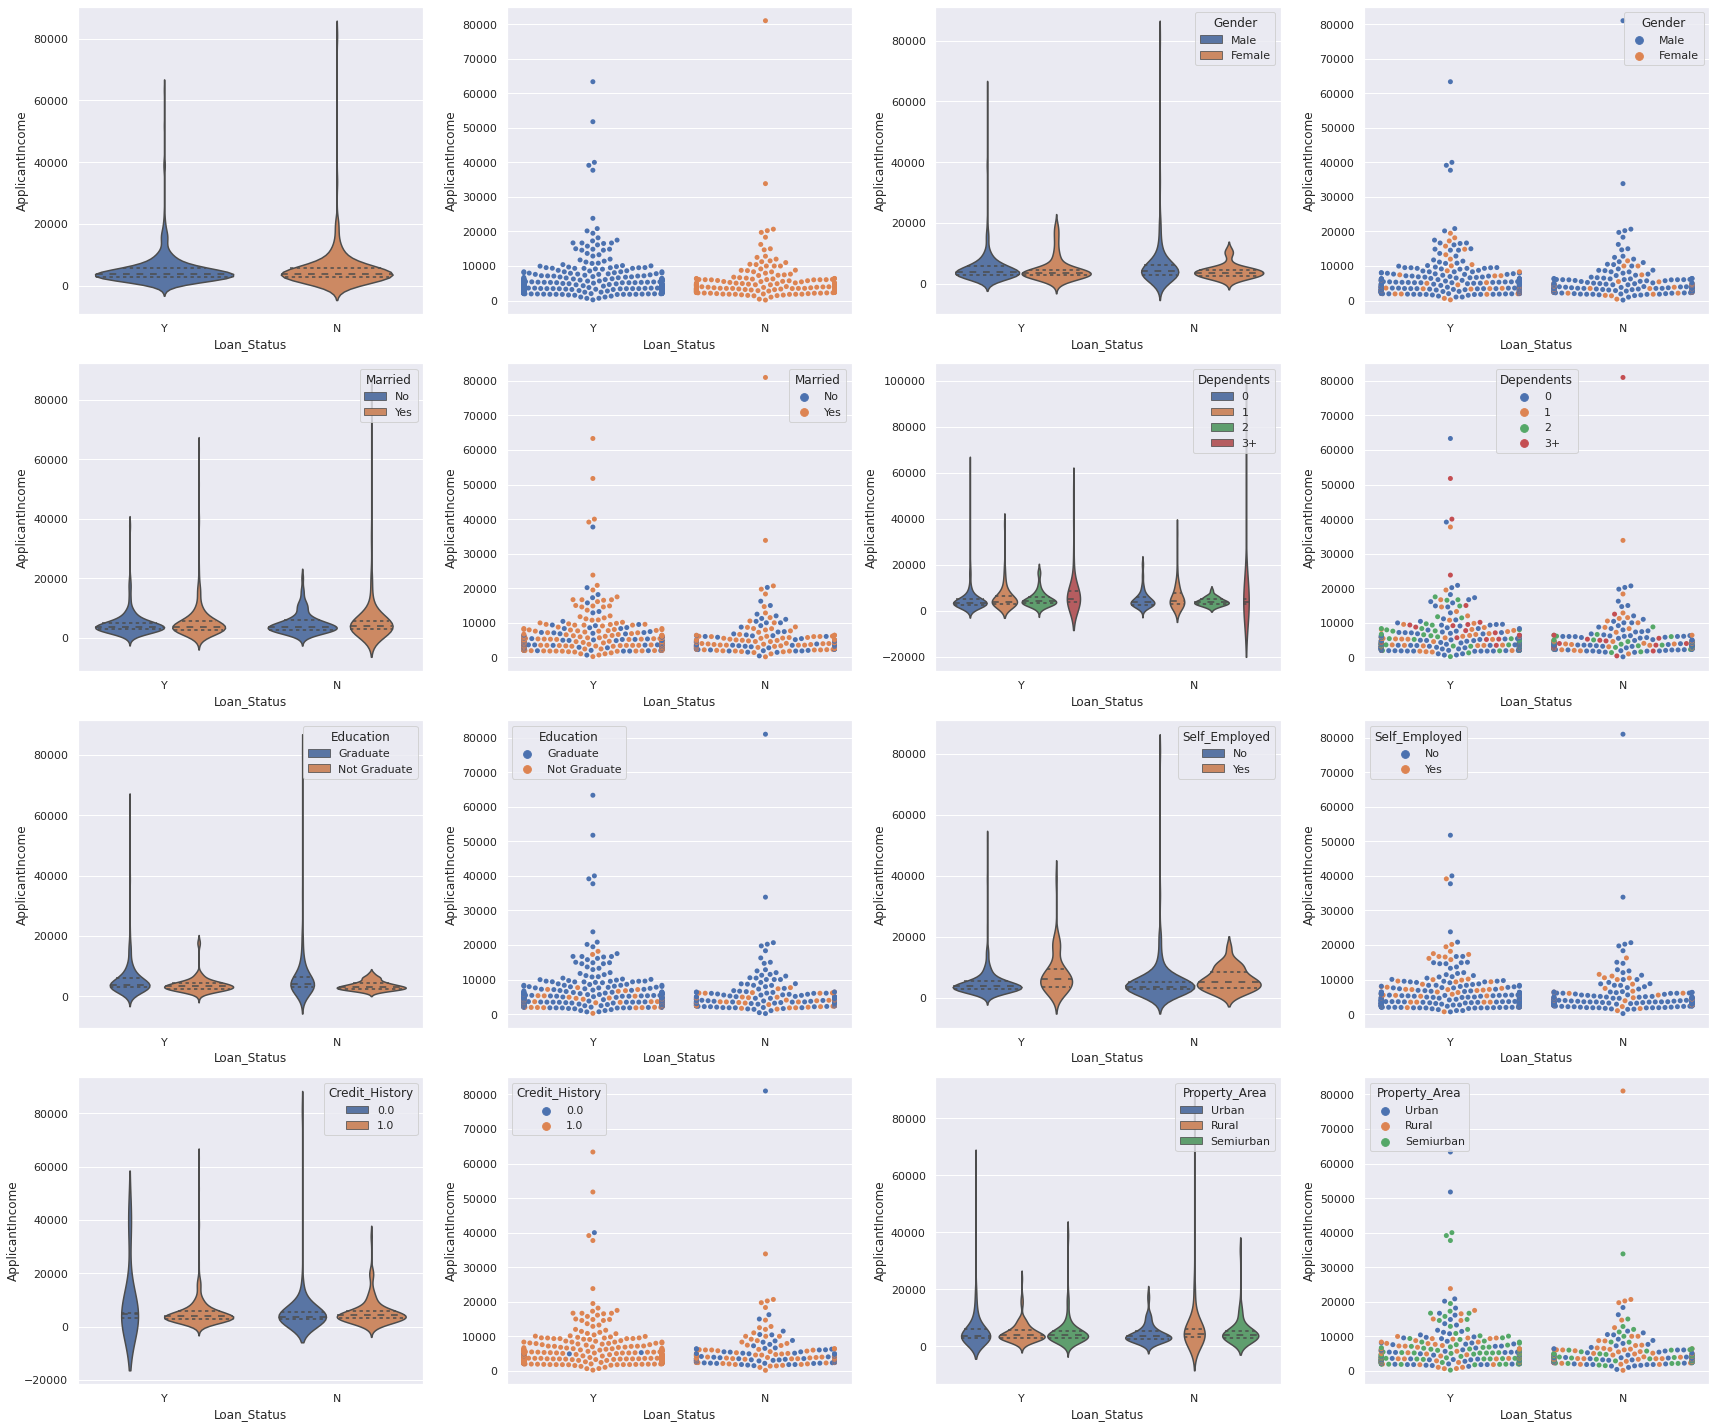

In [24]:
num_cols_vp(df,'ApplicantIncome')

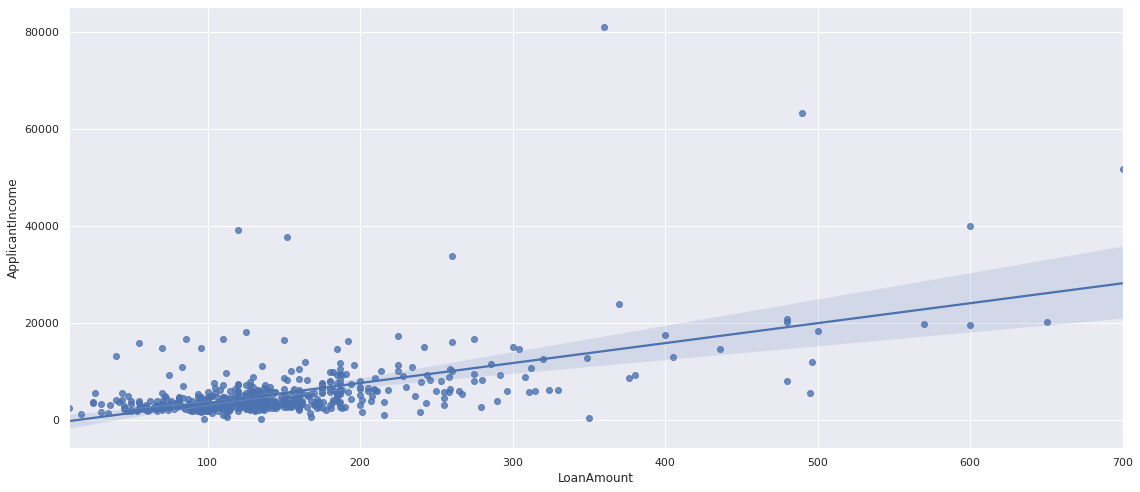

In [25]:
num_cols_rp(df,'ApplicantIncome','LoanAmount')

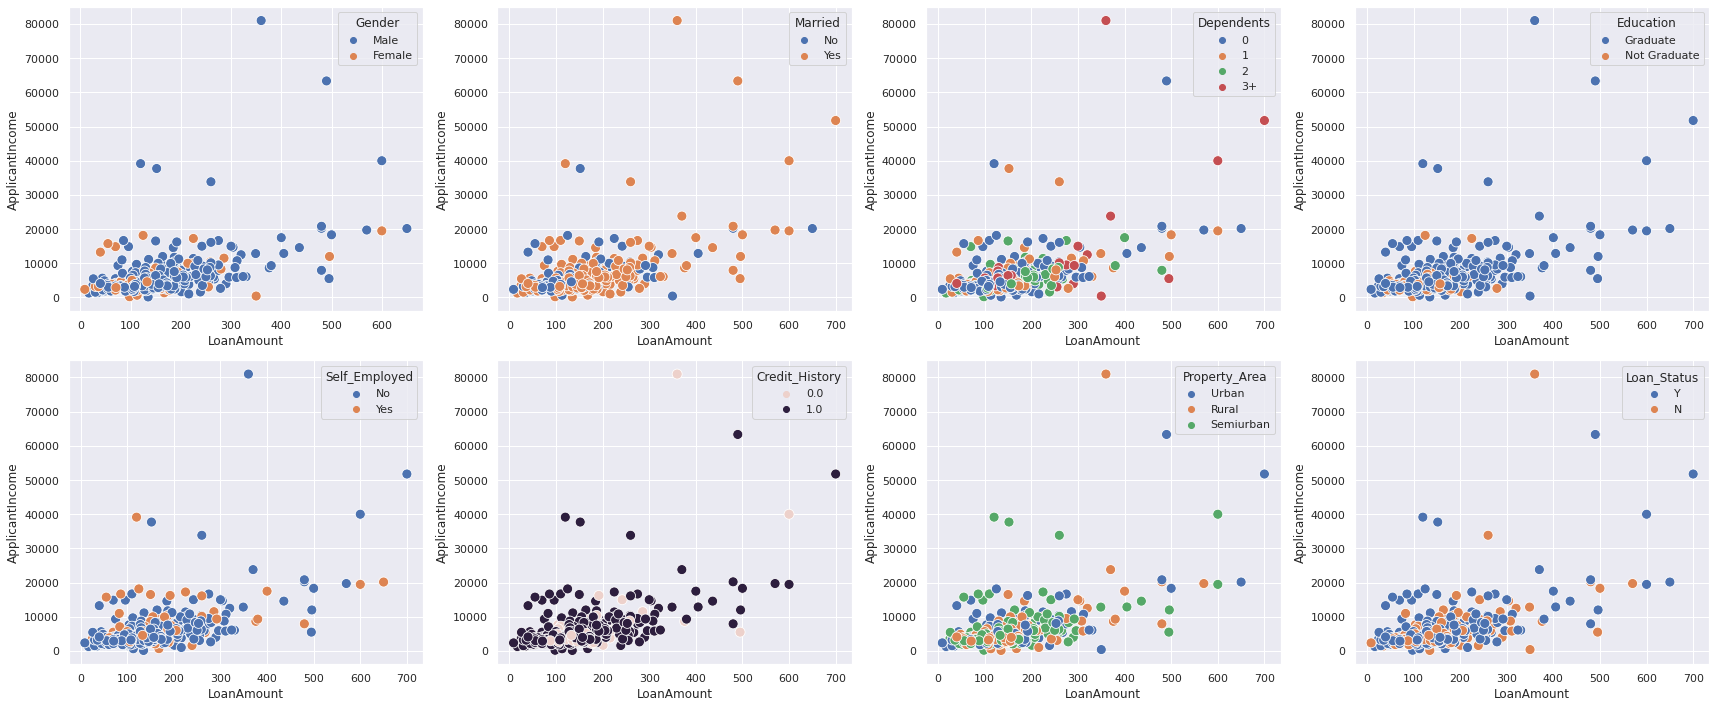

In [26]:
num_cols_sp(df,'ApplicantIncome','LoanAmount')

>***CoapplicantIncome***

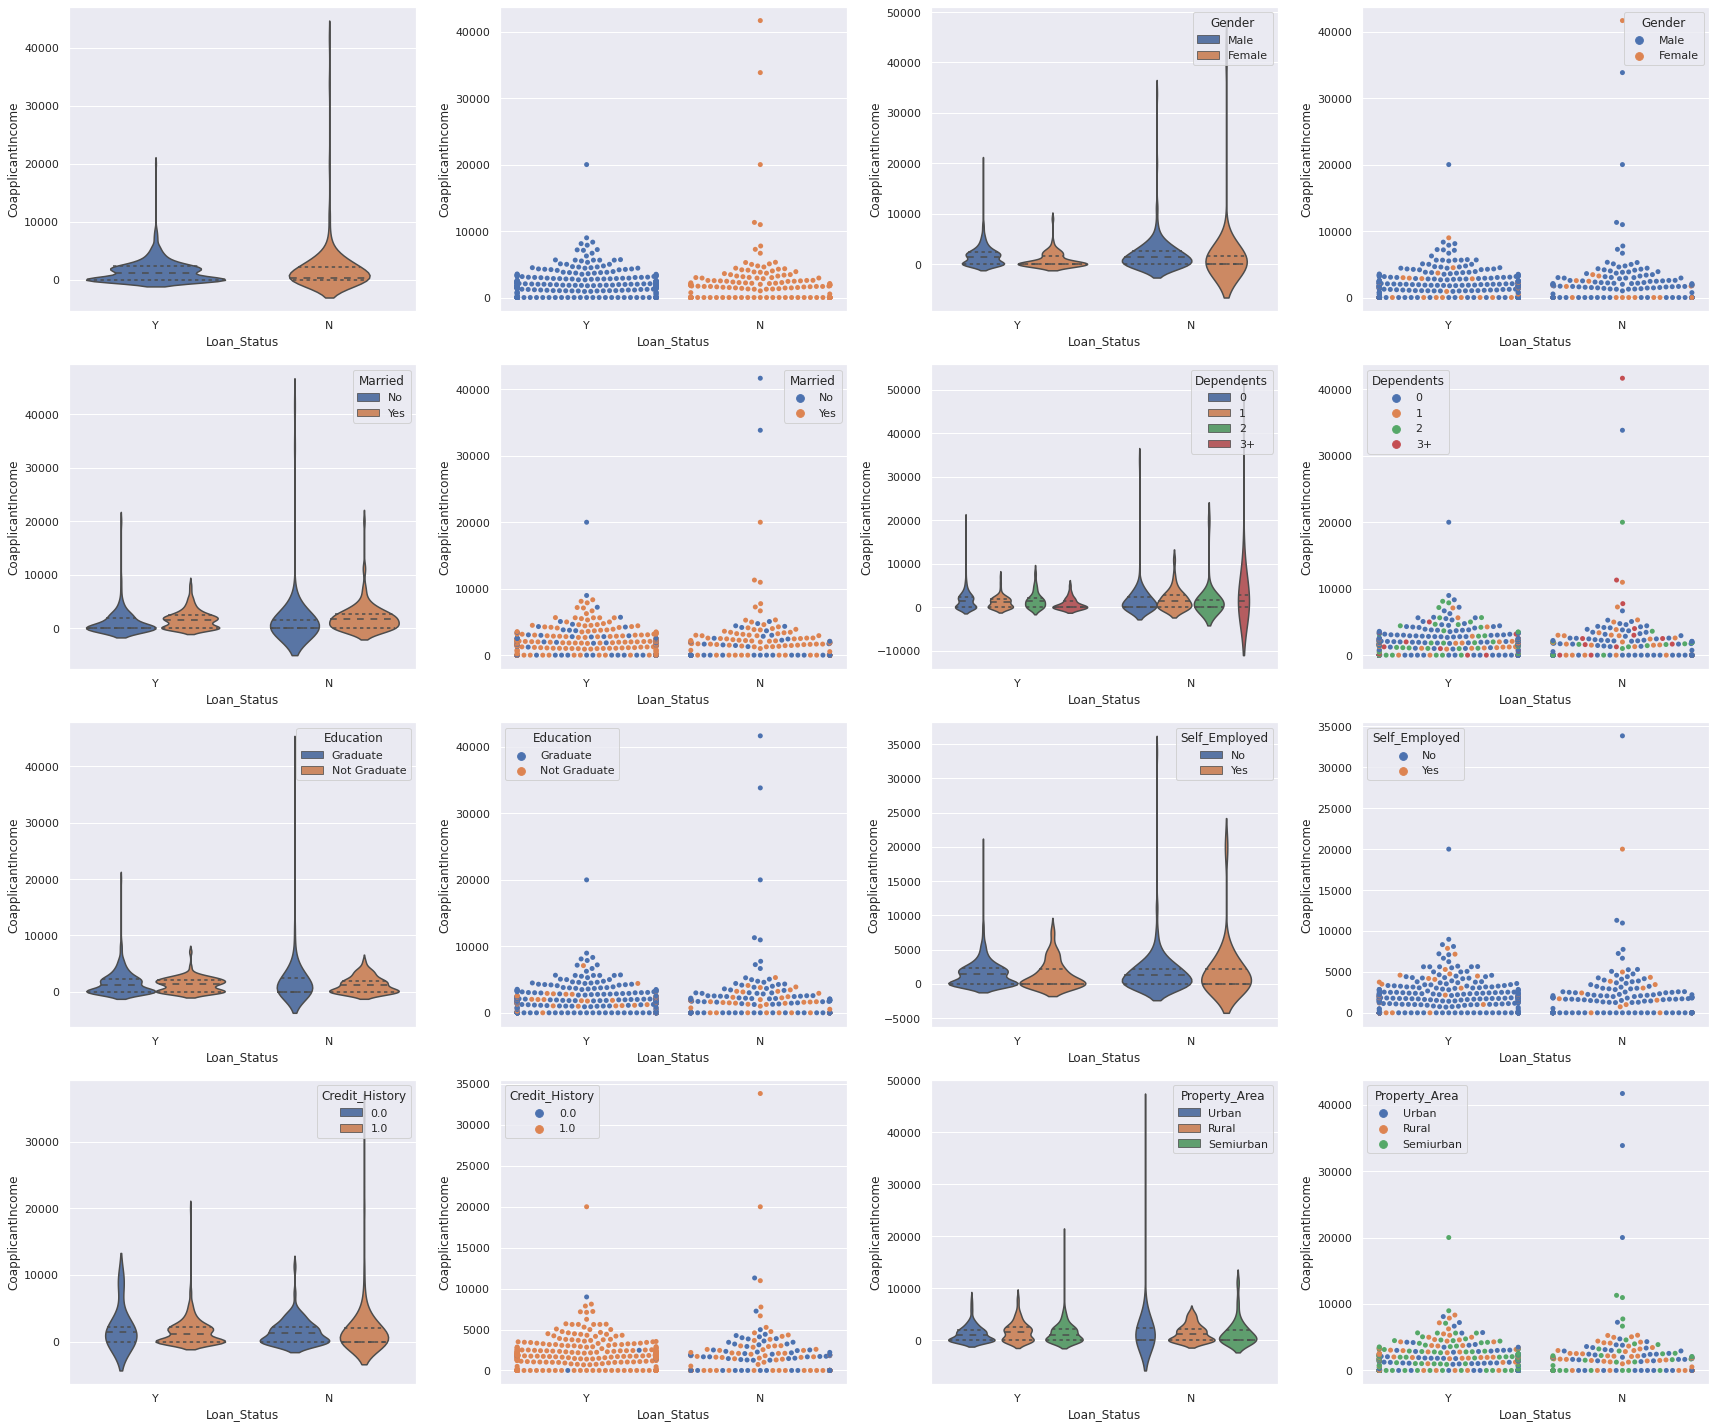

In [27]:
num_cols_vp(df,'CoapplicantIncome')

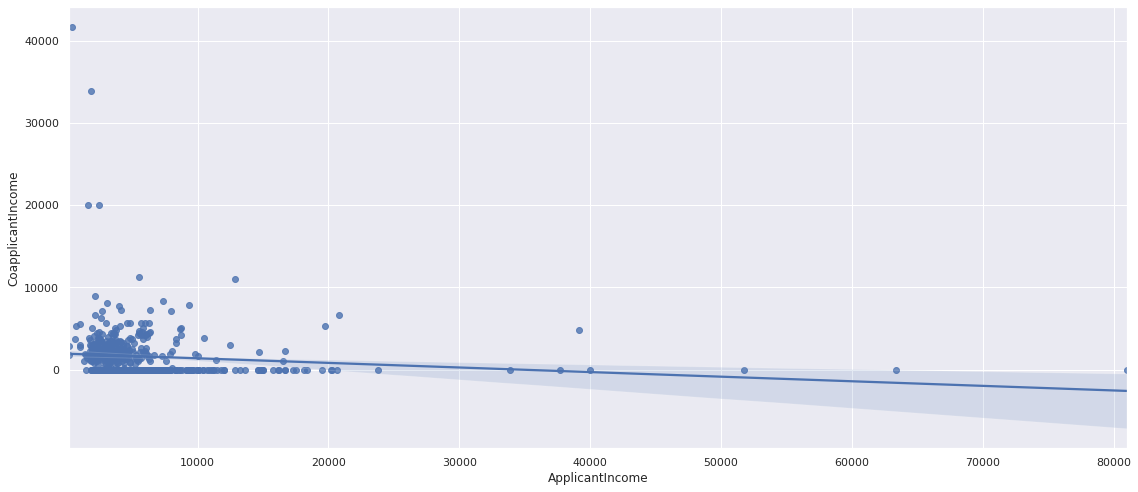

In [28]:
num_cols_rp(df,'CoapplicantIncome','ApplicantIncome')

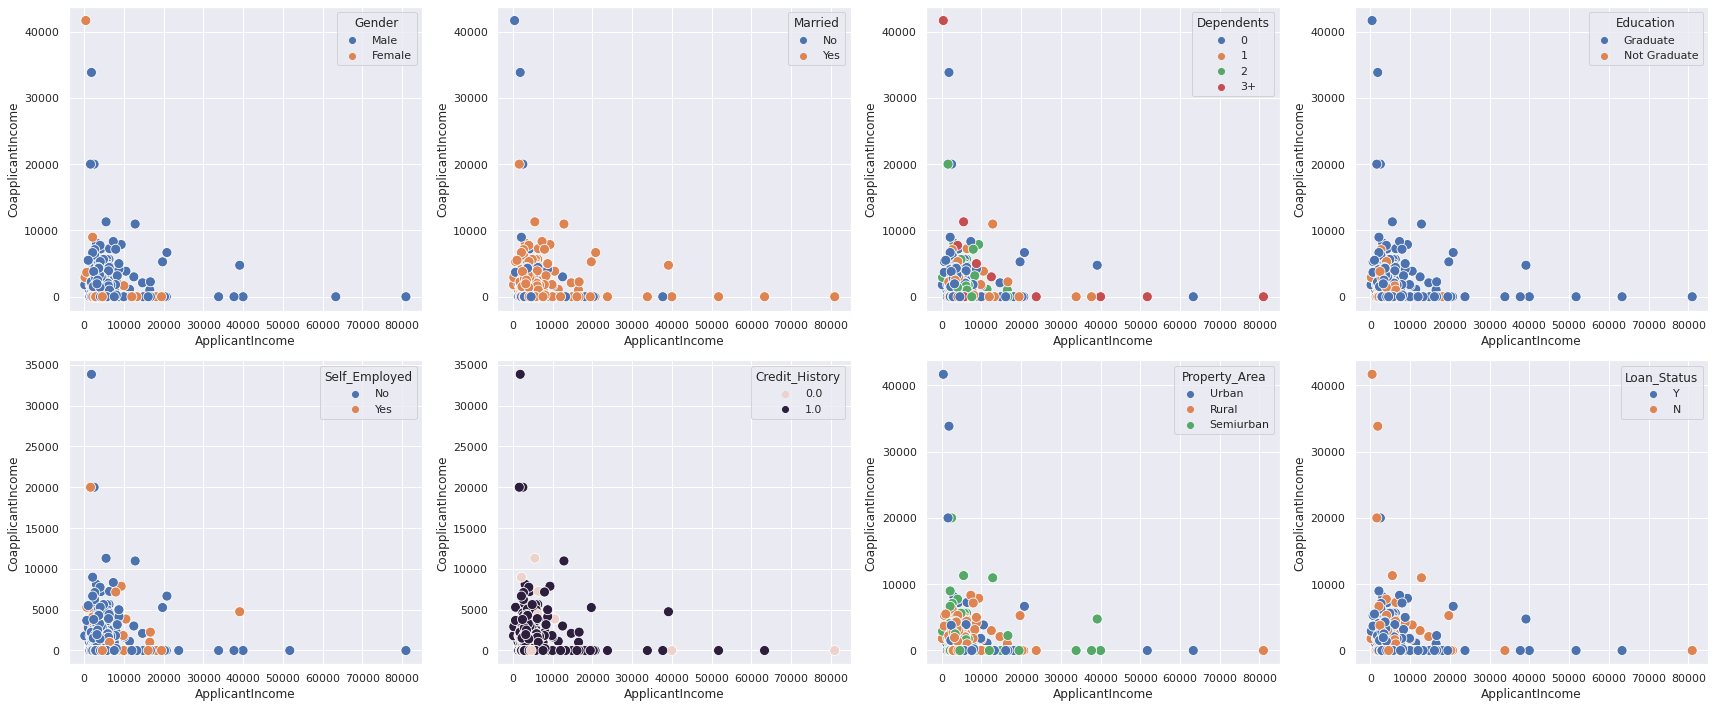

In [29]:
num_cols_sp(df,'CoapplicantIncome','ApplicantIncome')

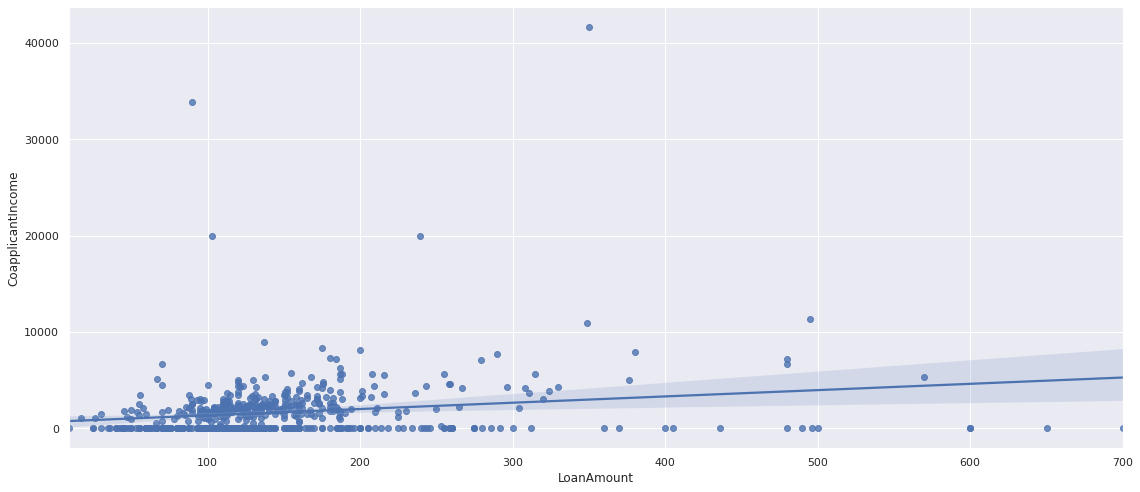

In [30]:
num_cols_rp(df,'CoapplicantIncome','LoanAmount')

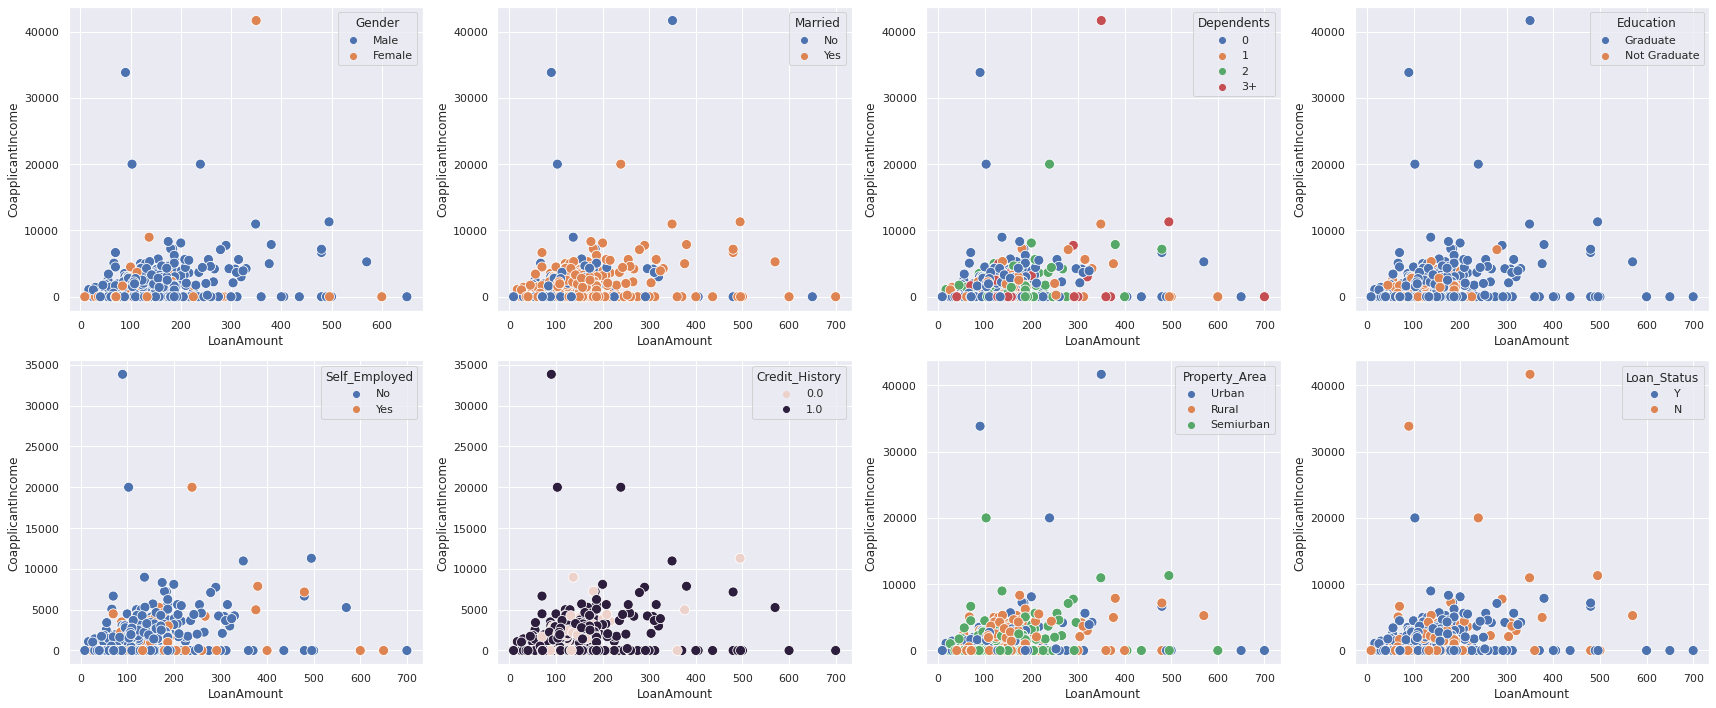

In [31]:
num_cols_sp(df,'CoapplicantIncome','LoanAmount')

In [32]:
def coaplicant_share(cols):
    x = cols[0]
    y = cols[1]
    if y == 0:
        return 'No Share'
    elif x == y :
        return 'Same Share'
    elif x > y and y >= x * 0.85 :
        return 'Lesser But Similar Share'
    elif y > x and y <= x * 1.15:
        return 'More But Similar Share'
    elif x > y :
        return 'Lesser Share'
    else:
        return 'More Share'

def coaplicant_share_similar(cols):
    x = cols[0]
    y = cols[1]
    if x == y or (x > y and y >= x * 0.85) or (y > x and y <= x * 1.15):
        return 'Similar'
    else:
        return 'Not Similar'

In [33]:
df['Has_Coapplicant'] = df.CoapplicantIncome.map(lambda x : 'Yes' if x != 0 else 'No')
df['Coapplicant_Share'] = df[['ApplicantIncome','CoapplicantIncome']].apply(coaplicant_share,axis=1)
df['Coapplicant_Share_Similarity'] = df[['ApplicantIncome','CoapplicantIncome']].apply(coaplicant_share_similar,axis=1)

>***Gender***

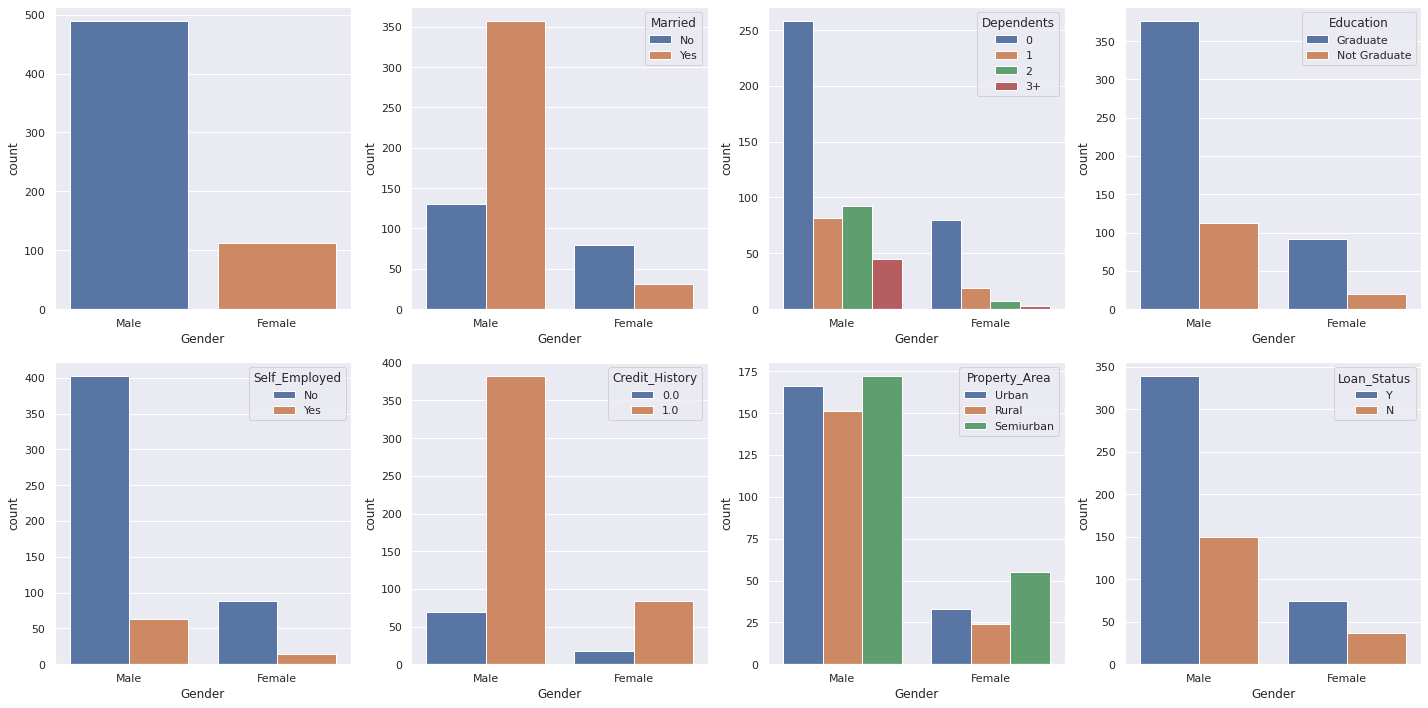

In [34]:
cat_cols_cp(df,'Gender')

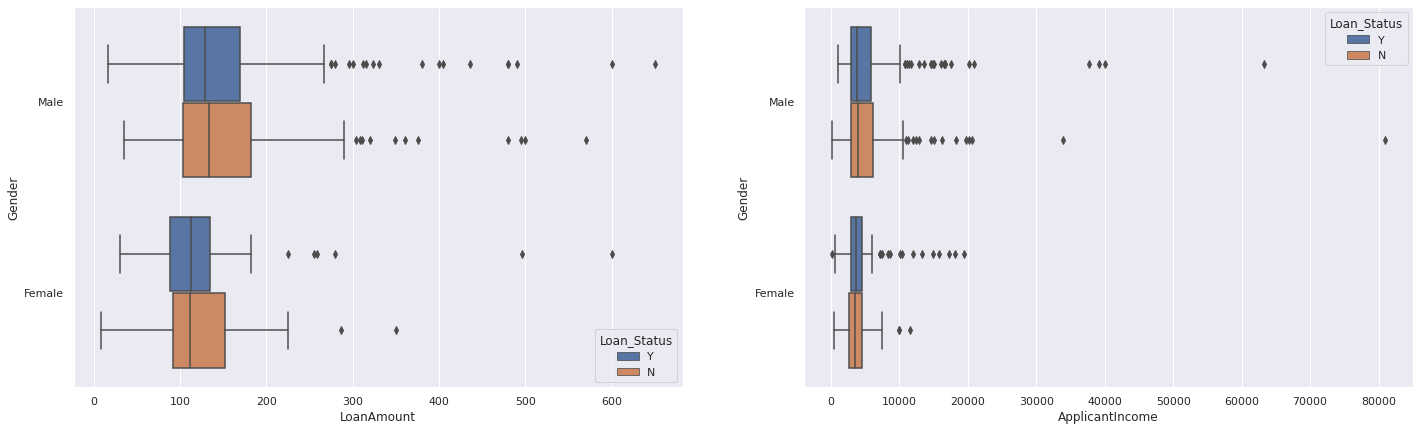

In [35]:
cat_cols_bp(df,'Gender')

In [36]:
df[pd.isna(df.Gender)]

Loan_ID Gender  ... Coapplicant_Share Coapplicant_Share_Similarity
23   LP001050    NaN  ...      Lesser Share                  Not Similar
126  LP001448    NaN  ...          No Share                  Not Similar
171  LP001585    NaN  ...          No Share                  Not Similar
188  LP001644    NaN  ...        More Share                  Not Similar
314  LP002024    NaN  ...      Lesser Share                  Not Similar
334  LP002103    NaN  ...      Lesser Share                  Not Similar
460  LP002478    NaN  ...        More Share                  Not Similar
467  LP002501    NaN  ...          No Share                  Not Similar
477  LP002530    NaN  ...      Lesser Share                  Not Similar
507  LP002625    NaN  ...          No Share                  Not Similar
576  LP002872    NaN  ...      Lesser Share                  Not Similar
588  LP002925    NaN  ...          No Share                  Not Similar
592  LP002933    NaN  ...          No Share                  Not Similar

[13 rows x 16 columns]

> ***Married***

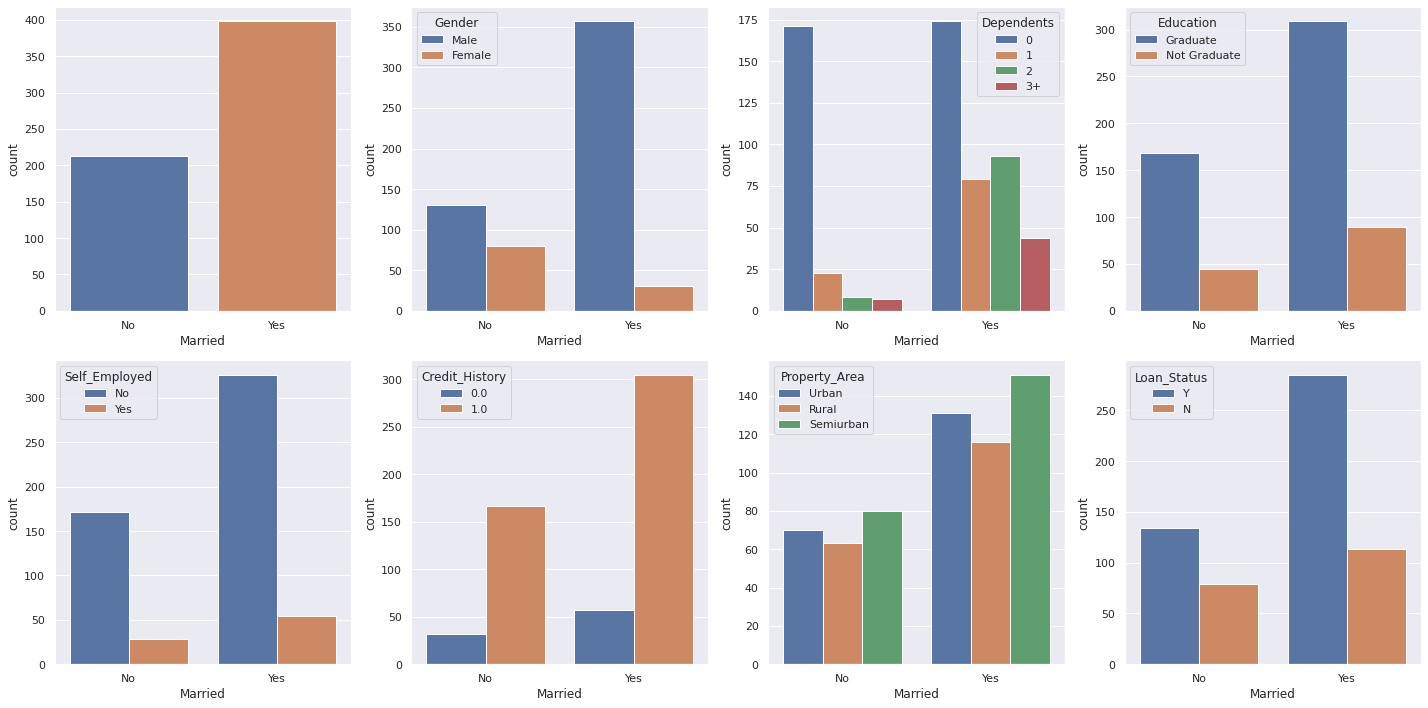

In [37]:
cat_cols_cp(df,'Married')

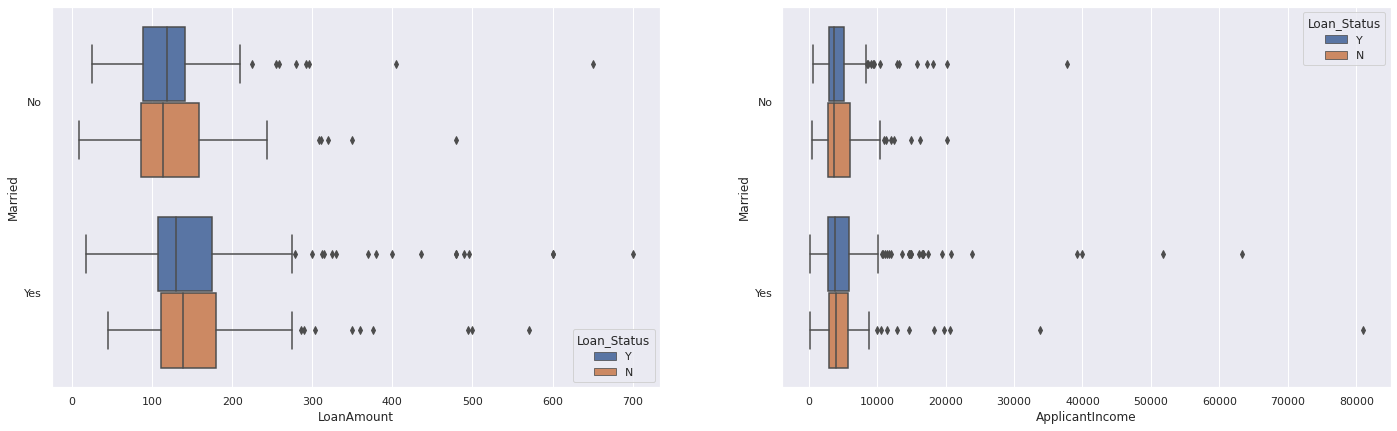

In [38]:
cat_cols_bp(df,'Married')

In [39]:
df[pd.isna(df.Married)]

Loan_ID  Gender  ... Coapplicant_Share Coapplicant_Share_Similarity
104  LP001357    Male  ...      Lesser Share                  Not Similar
228  LP001760    Male  ...          No Share                  Not Similar
435  LP002393  Female  ...          No Share                  Not Similar

[3 rows x 16 columns]

>***Dependents***

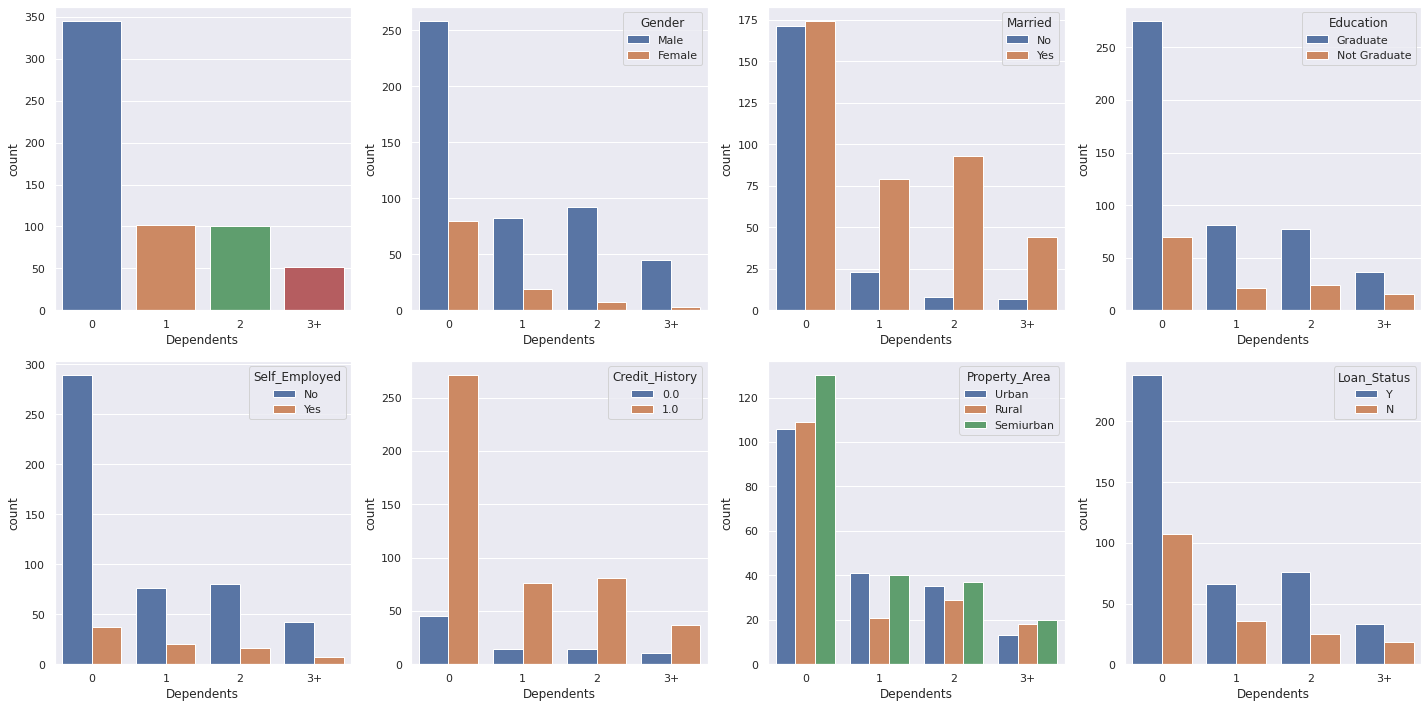

In [40]:
cat_cols_cp(df,'Dependents')

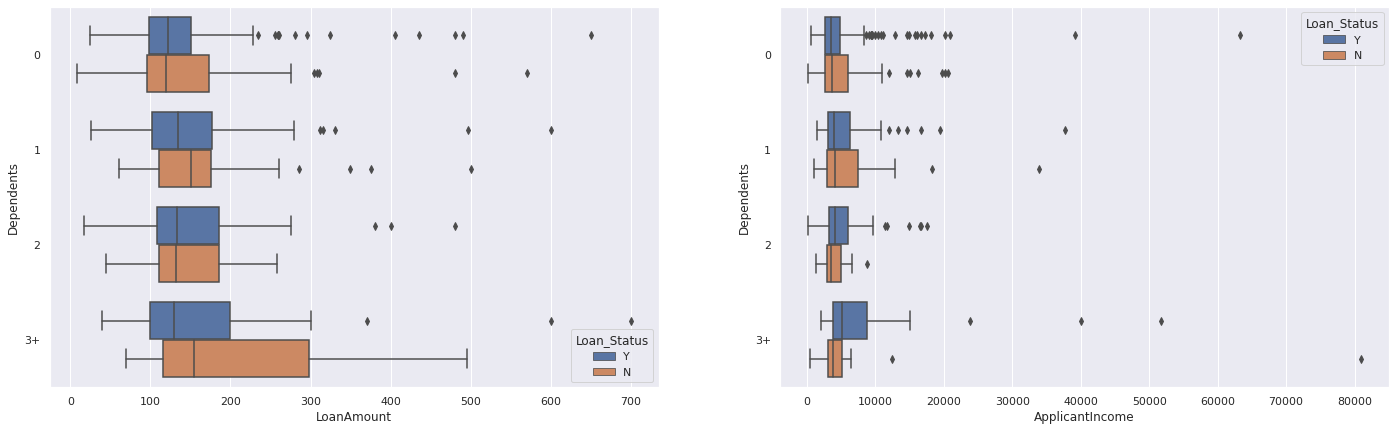

In [41]:
cat_cols_bp(df,'Dependents')

In [42]:
df[pd.isna(df.Dependents)]

Loan_ID  Gender  ...         Coapplicant_Share Coapplicant_Share_Similarity
102  LP001350    Male  ...                  No Share                  Not Similar
104  LP001357    Male  ...              Lesser Share                  Not Similar
120  LP001426    Male  ...              Lesser Share                  Not Similar
226  LP001754    Male  ...                  No Share                  Not Similar
228  LP001760    Male  ...                  No Share                  Not Similar
293  LP001945  Female  ...                  No Share                  Not Similar
301  LP001972    Male  ...              Lesser Share                  Not Similar
332  LP002100    Male  ...                  No Share                  Not Similar
335  LP002106    Male  ...              Lesser Share                  Not Similar
346  LP002130    Male  ...  Lesser But Similar Share                      Similar
355  LP002144  Female  ...                  No Share                  Not Similar
435  LP002393  Female  ...                  No Share                  Not Similar
517  LP002682    Male  ...              Lesser Share                  Not Similar
571  LP002847    Male  ...              Lesser Share                  Not Similar
597  LP002943    Male  ...                  No Share                  Not Similar

[15 rows x 16 columns]

In [43]:
df.groupby(['Gender','Married','Dependents'])['Dependents'].count()

Gender  Married  Dependents
Female  No       0              60
                 1              13
                 2               2
                 3+              3
        Yes      0              20
                 1               6
                 2               5
Male    No       0             109
                 1              10
                 2               6
                 3+              3
        Yes      0             149
                 1              72
                 2              86
                 3+             42
Name: Dependents, dtype: int64

In [44]:
df.groupby(['Dependents'])['LoanAmount'].mean()

Dependents
0     135.886228
1     158.622449
2     150.224490
3+    190.897959
Name: LoanAmount, dtype: float64

In [45]:
df.groupby(['Dependents'])['LoanAmount'].median()

Dependents
0     120.0
1     139.0
2     133.0
3+    130.0
Name: LoanAmount, dtype: float64

In [46]:
df['Has_Dependents'] = df['Dependents'].map(lambda x : 'No' if str(x) == '0' else 'Yes')

>***Education***

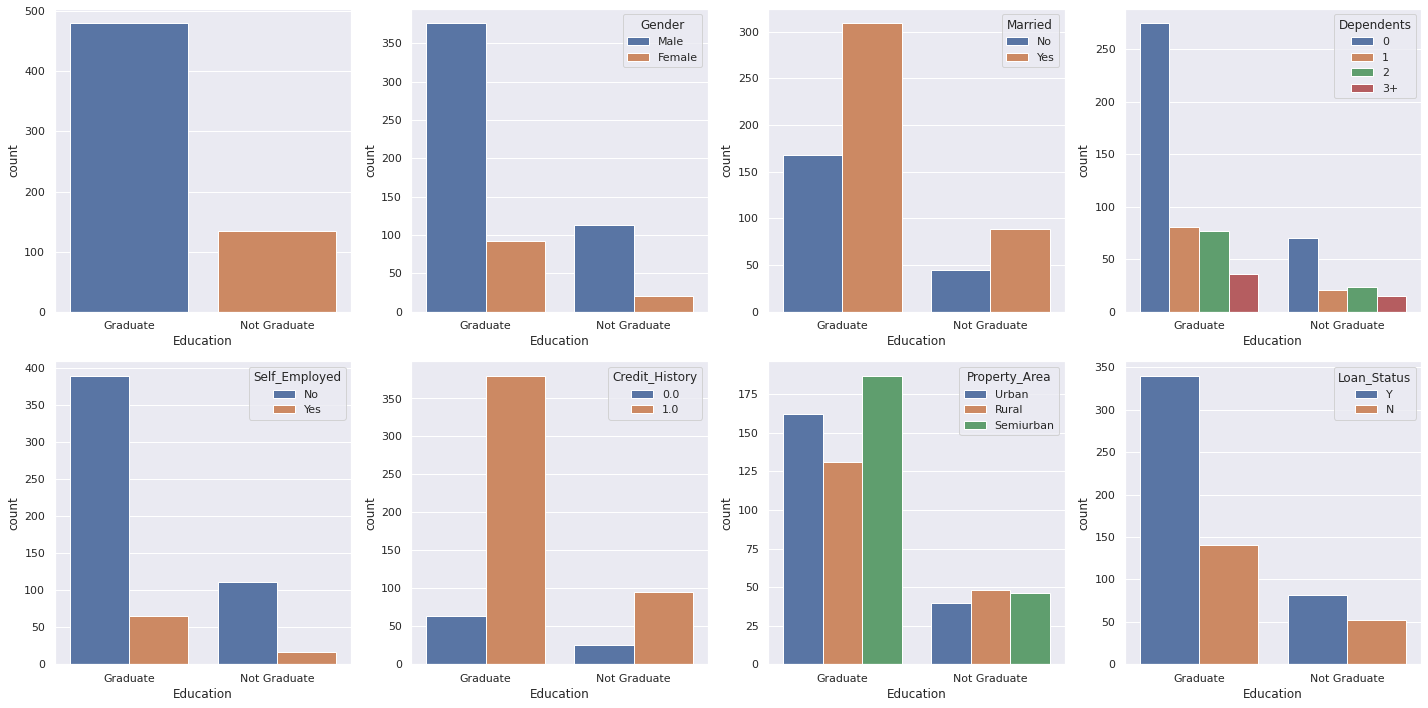

In [47]:
cat_cols_cp(df,'Education')

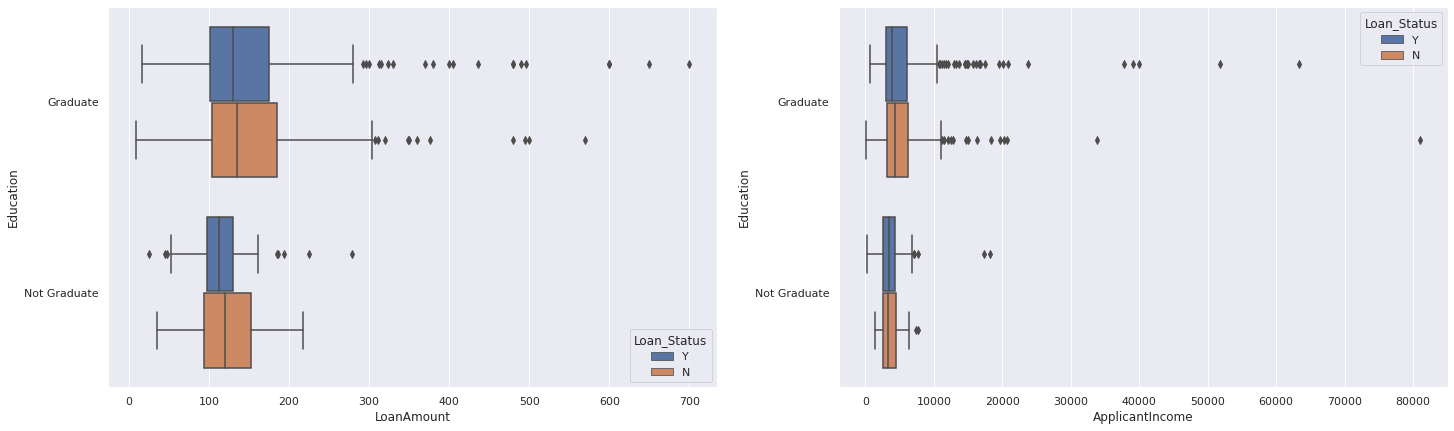

In [48]:
cat_cols_bp(df,'Education')

>***Self_Employed***

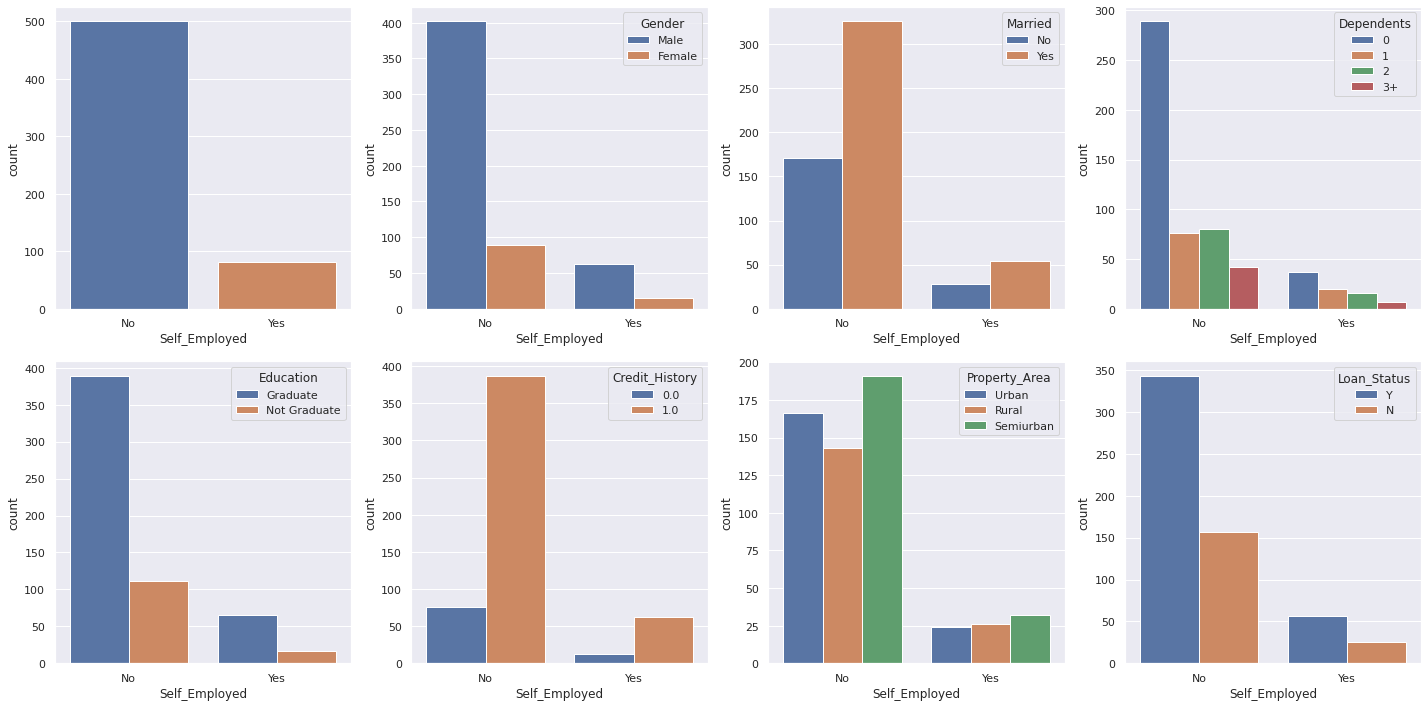

In [49]:
cat_cols_cp(df,'Self_Employed')

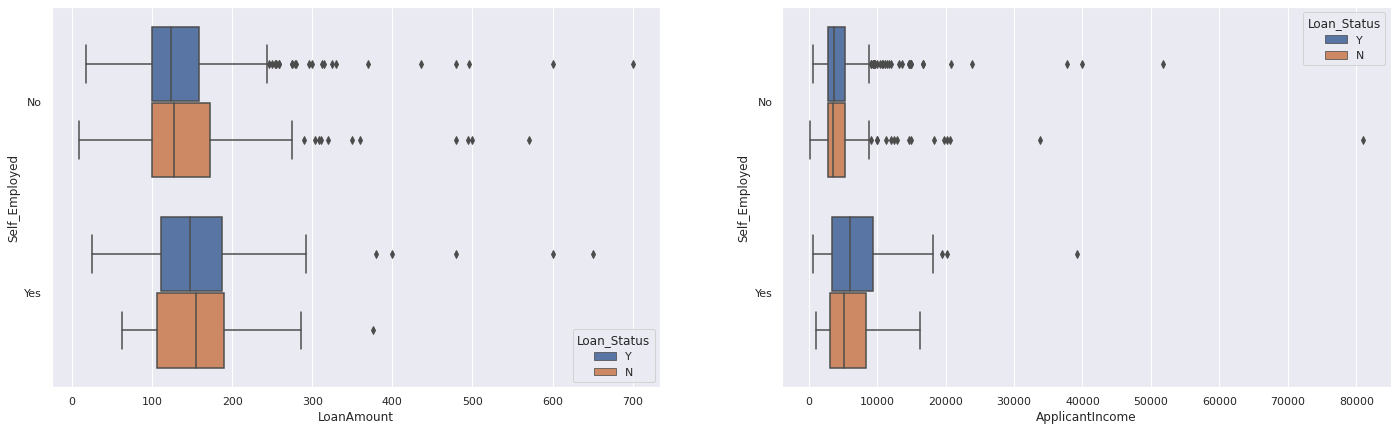

In [50]:
cat_cols_bp(df,'Self_Employed')

In [51]:
df[pd.isna(df.Self_Employed)]

Loan_ID  Gender  ... Coapplicant_Share_Similarity Has_Dependents
11   LP001027    Male  ...                  Not Similar            Yes
19   LP001041    Male  ...                  Not Similar             No
24   LP001052    Male  ...                  Not Similar            Yes
29   LP001087  Female  ...                  Not Similar            Yes
30   LP001091    Male  ...                  Not Similar            Yes
95   LP001326    Male  ...                  Not Similar             No
107  LP001370    Male  ...                  Not Similar             No
111  LP001387  Female  ...                  Not Similar             No
114  LP001398    Male  ...                  Not Similar             No
158  LP001546    Male  ...                  Not Similar             No
170  LP001581    Male  ...                      Similar             No
218  LP001732    Male  ...                  Not Similar            Yes
231  LP001768    Male  ...                  Not Similar             No
236  LP001786    Male  ...                  Not Similar             No
268  LP001883  Female  ...                  Not Similar             No
295  LP001949    Male  ...                  Not Similar            Yes
333  LP002101    Male  ...                  Not Similar             No
336  LP002110    Male  ...                  Not Similar            Yes
344  LP002128    Male  ...                      Similar            Yes
374  LP002209  Female  ...                  Not Similar             No
380  LP002226    Male  ...                  Not Similar             No
385  LP002237    Male  ...                  Not Similar            Yes
411  LP002319    Male  ...                  Not Similar             No
432  LP002386    Male  ...                  Not Similar             No
447  LP002435    Male  ...                  Not Similar             No
463  LP002489  Female  ...                  Not Similar            Yes
468  LP002502  Female  ...                  Not Similar            Yes
535  LP002732    Male  ...                  Not Similar             No
542  LP002753  Female  ...                  Not Similar            Yes
579  LP002888    Male  ...                      Similar             No
600  LP002949  Female  ...                  Not Similar            Yes
601  LP002950    Male  ...                      Similar             No

[32 rows x 17 columns]

In [52]:
df.groupby(['Education','Self_Employed'])['Self_Employed'].count()

Education     Self_Employed
Graduate      No               389
              Yes               65
Not Graduate  No               111
              Yes               17
Name: Self_Employed, dtype: int64

In [53]:
df.groupby(['Property_Area','Self_Employed'])['Self_Employed'].count()

Property_Area  Self_Employed
Rural          No               143
               Yes               26
Semiurban      No               191
               Yes               32
Urban          No               166
               Yes               24
Name: Self_Employed, dtype: int64

>***Loan_Amount_Term***

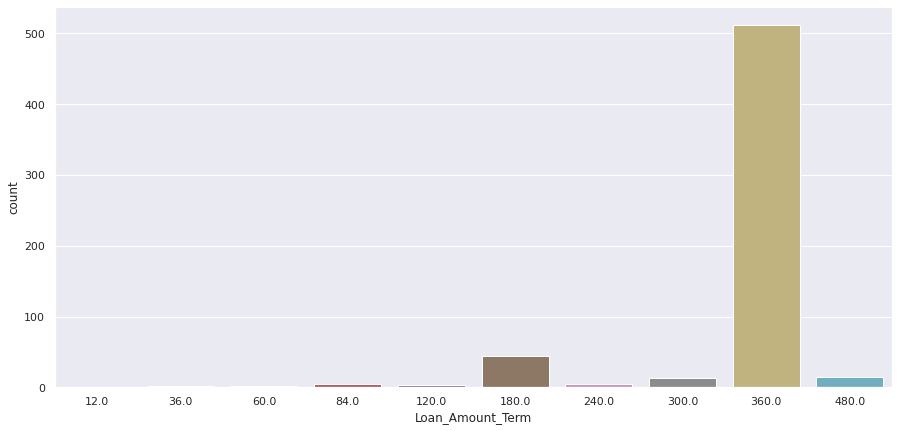

In [54]:
plt.figure(figsize=(15,7))
sns.countplot(df.Loan_Amount_Term)

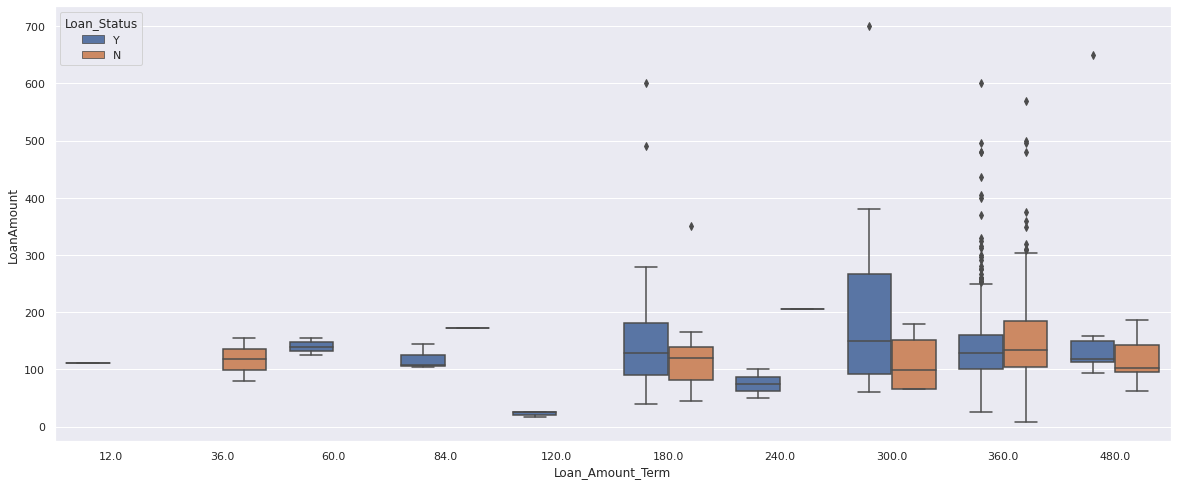

In [55]:
plt.figure(figsize=(20,8))
sns.boxplot(x=df.Loan_Amount_Term,y=df.LoanAmount,hue=df.Loan_Status)

In [56]:
df[pd.isnull(df.Loan_Amount_Term)]

Loan_ID  Gender  ... Coapplicant_Share_Similarity Has_Dependents
19   LP001041    Male  ...                  Not Similar             No
36   LP001109    Male  ...                  Not Similar             No
44   LP001136    Male  ...                  Not Similar             No
45   LP001137  Female  ...                  Not Similar             No
73   LP001250    Male  ...                  Not Similar            Yes
112  LP001391    Male  ...                  Not Similar             No
165  LP001574    Male  ...                      Similar             No
197  LP001669  Female  ...                  Not Similar             No
223  LP001749    Male  ...                  Not Similar             No
232  LP001770    Male  ...                  Not Similar             No
335  LP002106    Male  ...                  Not Similar            Yes
367  LP002188    Male  ...                  Not Similar             No
421  LP002357  Female  ...                  Not Similar             No
423  LP002362    Male  ...                  Not Similar            Yes

[14 rows x 17 columns]

In [57]:
df.groupby(['Credit_History','Loan_Amount_Term'])['Loan_Amount_Term'].count()

Credit_History  Loan_Amount_Term
0.0             180.0                10
                300.0                 3
                360.0                66
                480.0                 4
1.0             36.0                  2
                60.0                  2
                84.0                  3
                120.0                 3
                180.0                33
                240.0                 3
                300.0                 7
                360.0               404
                480.0                10
Name: Loan_Amount_Term, dtype: int64

In [58]:
df.groupby(['Self_Employed','Loan_Amount_Term'])['Loan_Amount_Term'].count()

Self_Employed  Loan_Amount_Term
No             12.0                  1
               36.0                  2
               60.0                  1
               84.0                  3
               120.0                 2
               180.0                35
               240.0                 3
               300.0                10
               360.0               418
               480.0                14
Yes            60.0                  1
               84.0                  1
               120.0                 1
               180.0                 5
               240.0                 1
               300.0                 3
               360.0                67
               480.0                 1
Name: Loan_Amount_Term, dtype: int64

>***Credit_History***

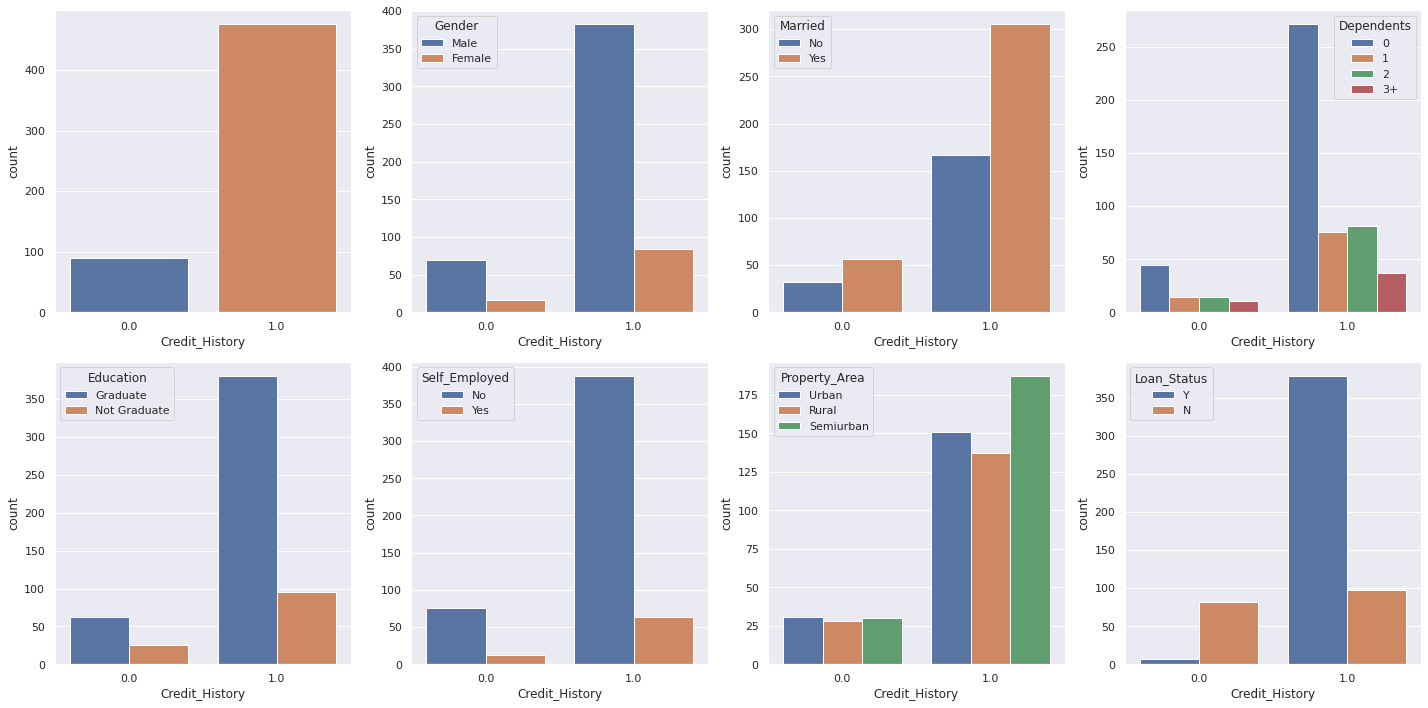

In [59]:
cat_cols_cp(df,'Credit_History')

>***Property_Area***

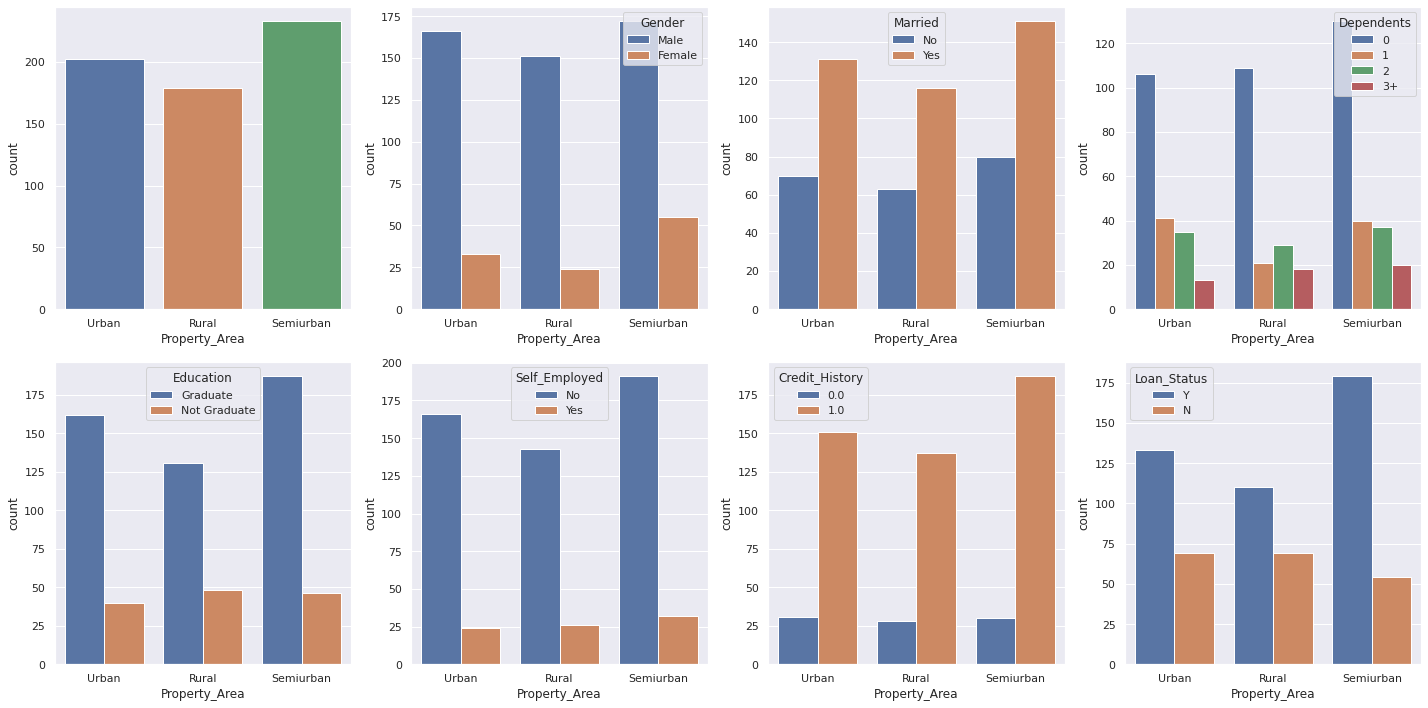

In [60]:
cat_cols_cp(df,'Property_Area')

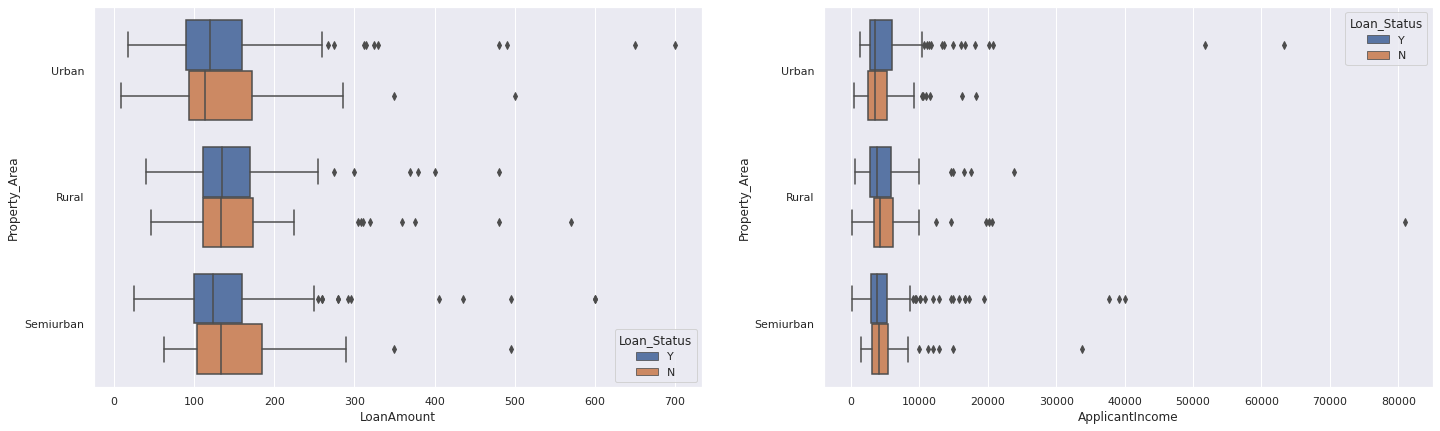

In [61]:
cat_cols_bp(df,'Property_Area')

>***Has_Coapplicant***

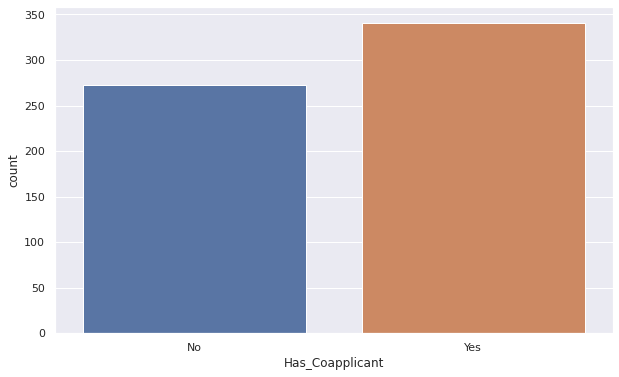

In [62]:
plt.figure(figsize=(10,6))
sns.countplot(df.Has_Coapplicant)

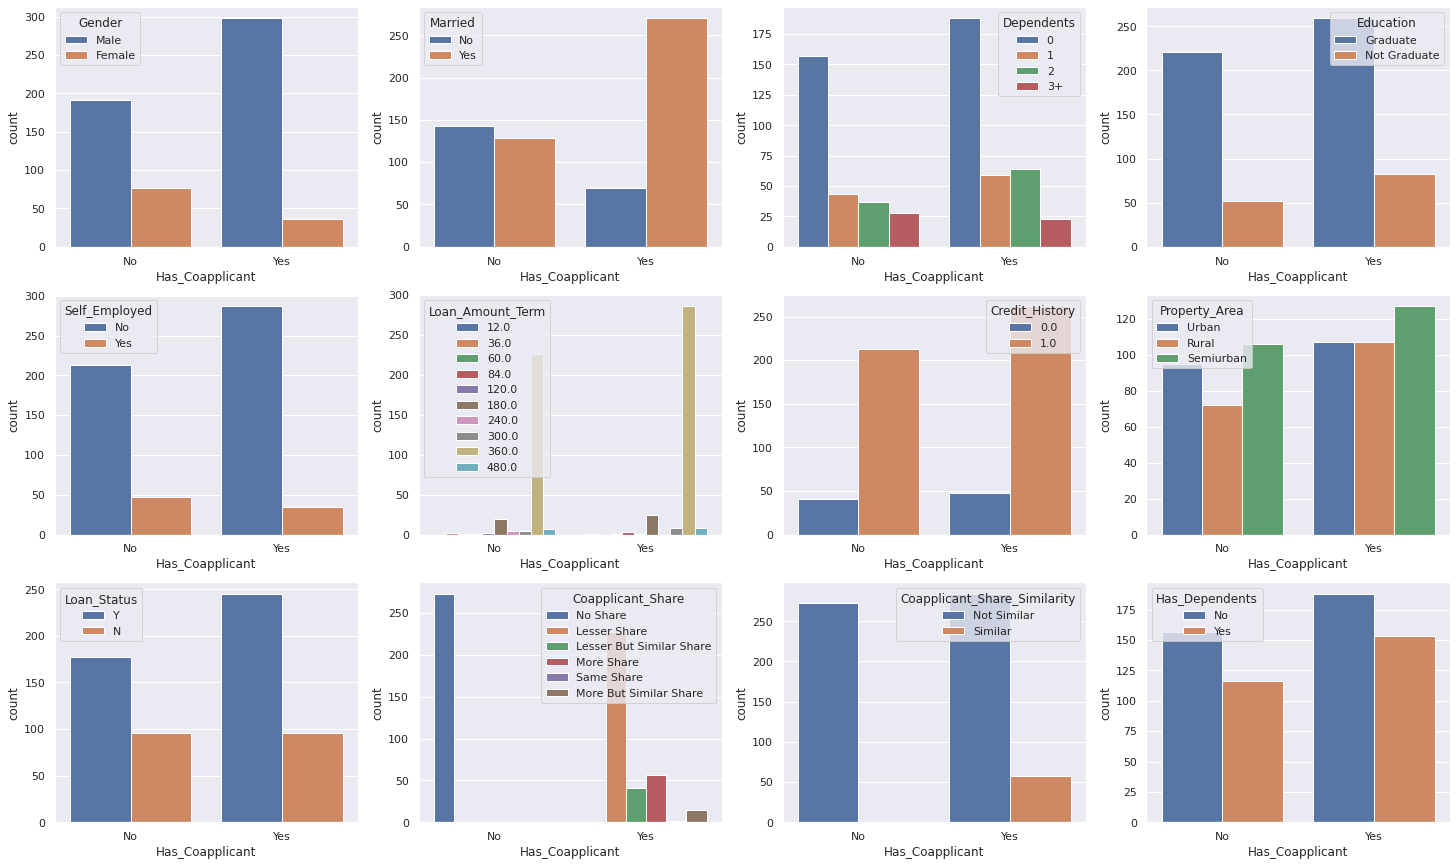

In [63]:
fig,axs = plt.subplots(3,4,figsize=(25,15))

sns.countplot(df.Has_Coapplicant,ax=axs[0][0],hue=df.Gender)
sns.countplot(df.Has_Coapplicant,ax=axs[0][1],hue=df.Married)
sns.countplot(df.Has_Coapplicant,ax=axs[0][2],hue=df.Dependents)
sns.countplot(df.Has_Coapplicant,ax=axs[0][3],hue=df.Education)
sns.countplot(df.Has_Coapplicant,ax=axs[1][0],hue=df.Self_Employed)
sns.countplot(df.Has_Coapplicant,ax=axs[1][1],hue=df.Loan_Amount_Term)
sns.countplot(df.Has_Coapplicant,ax=axs[1][2],hue=df.Credit_History)
sns.countplot(df.Has_Coapplicant,ax=axs[1][3],hue=df.Property_Area)
sns.countplot(df.Has_Coapplicant,ax=axs[2][0],hue=df.Loan_Status)
sns.countplot(df.Has_Coapplicant,ax=axs[2][1],hue=df.Coapplicant_Share)
sns.countplot(df.Has_Coapplicant,ax=axs[2][2],hue=df.Coapplicant_Share_Similarity)
sns.countplot(df.Has_Coapplicant,ax=axs[2][3],hue=df.Has_Dependents)

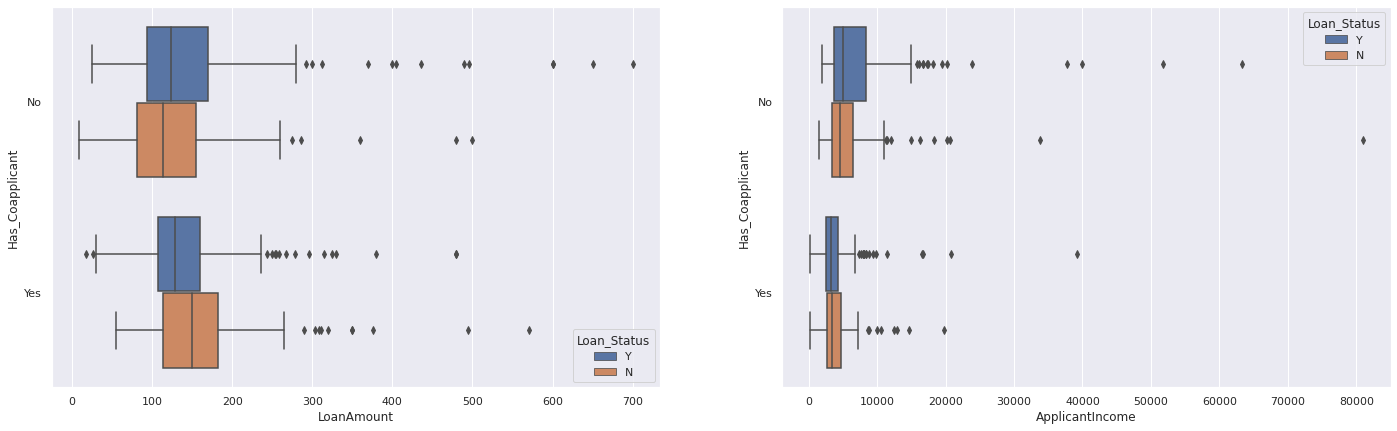

In [64]:
cat_cols_bp(df,'Has_Coapplicant')

>***Coapplicant_Share***

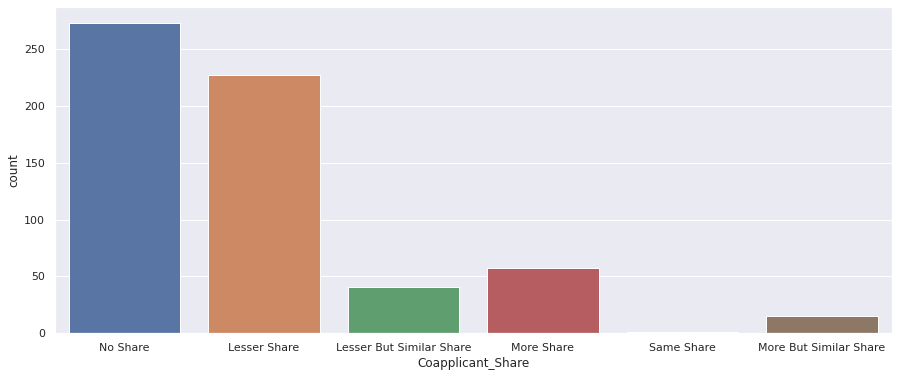

In [65]:
plt.figure(figsize=(15,6))
sns.countplot(df.Coapplicant_Share)

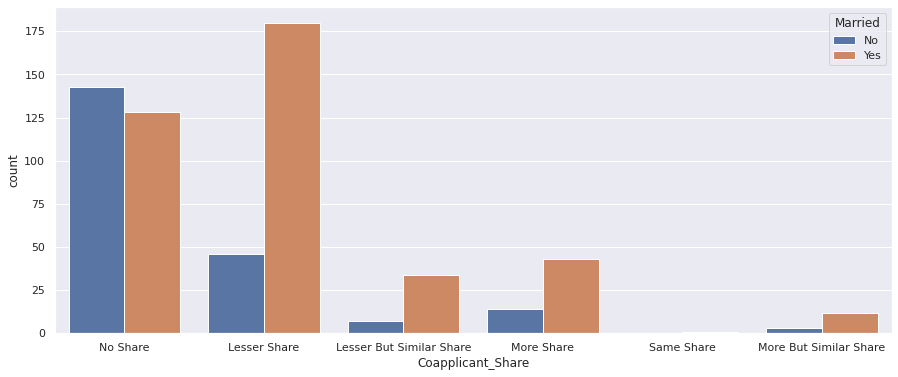

In [66]:
plt.figure(figsize=(15,6))
sns.countplot(df.Coapplicant_Share,hue=df.Married)

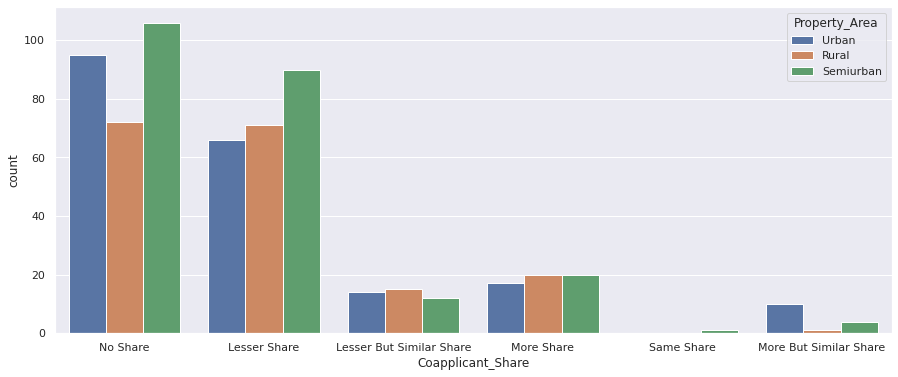

In [67]:
plt.figure(figsize=(15,6))
sns.countplot(df.Coapplicant_Share,hue=df.Property_Area)

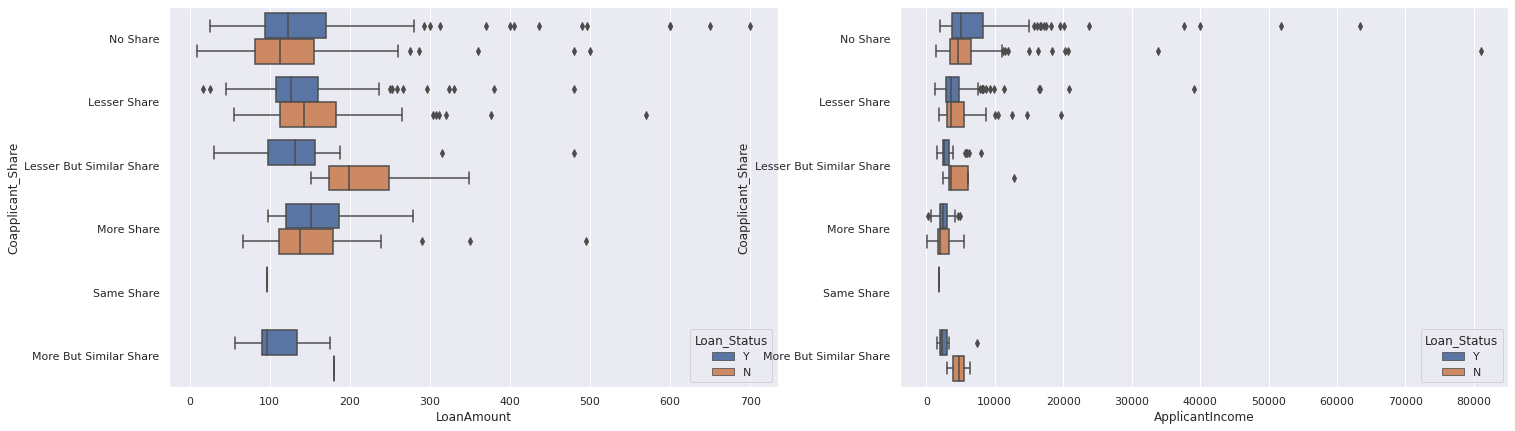

In [68]:
cat_cols_bp(df,'Coapplicant_Share')

>***Coapplicant_Share_Similarity***

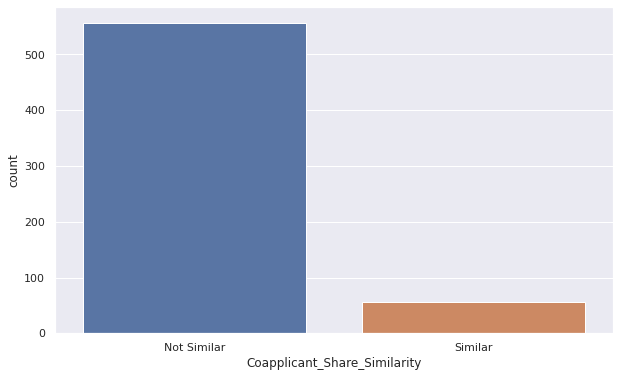

In [69]:
plt.figure(figsize=(10,6))
sns.countplot(df.Coapplicant_Share_Similarity)

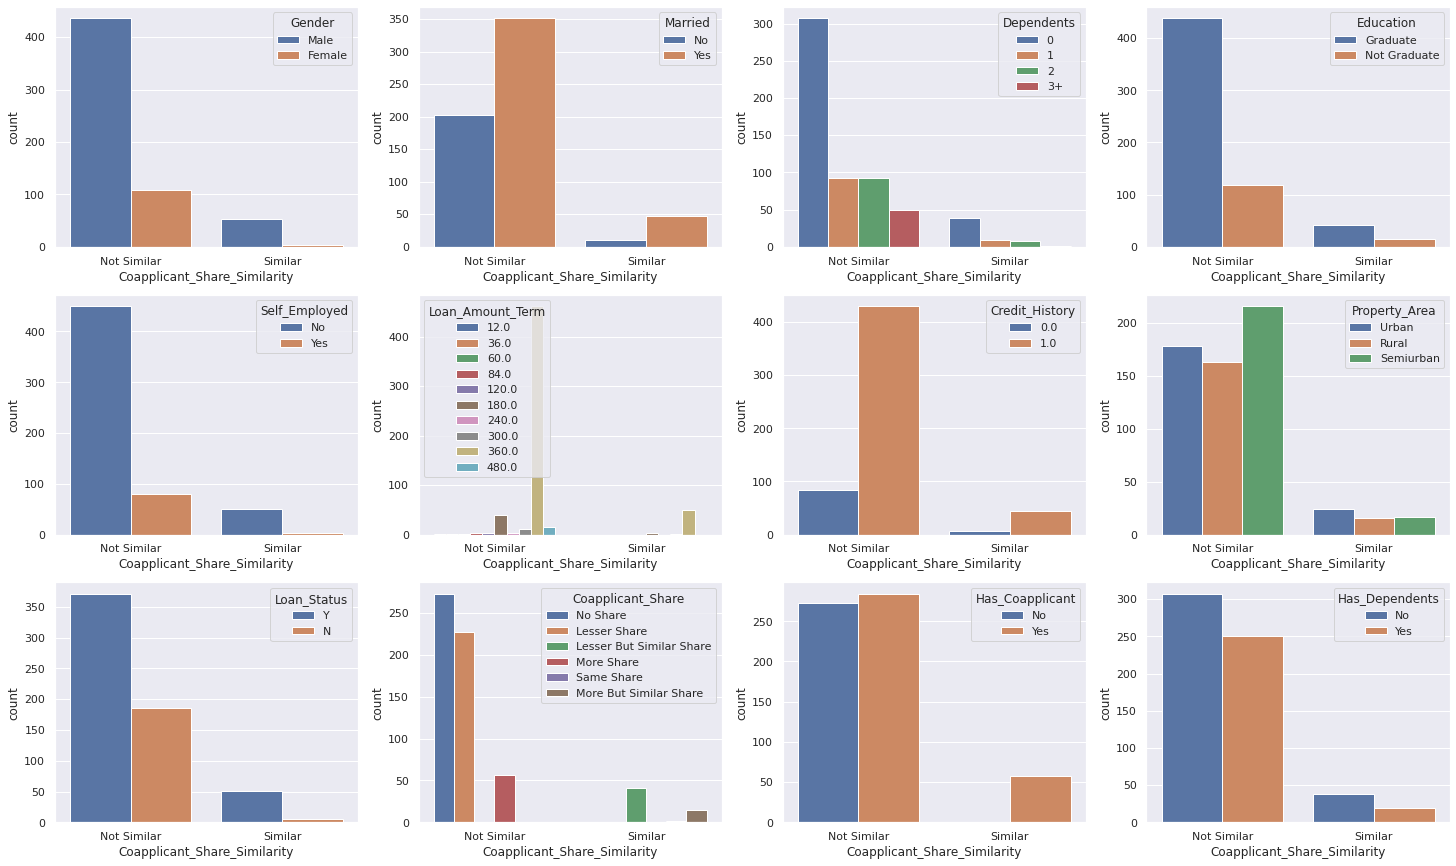

In [70]:
fig,axs = plt.subplots(3,4,figsize=(25,15))

sns.countplot(df.Coapplicant_Share_Similarity,ax=axs[0][0],hue=df.Gender)
sns.countplot(df.Coapplicant_Share_Similarity,ax=axs[0][1],hue=df.Married)
sns.countplot(df.Coapplicant_Share_Similarity,ax=axs[0][2],hue=df.Dependents)
sns.countplot(df.Coapplicant_Share_Similarity,ax=axs[0][3],hue=df.Education)
sns.countplot(df.Coapplicant_Share_Similarity,ax=axs[1][0],hue=df.Self_Employed)
sns.countplot(df.Coapplicant_Share_Similarity,ax=axs[1][1],hue=df.Loan_Amount_Term)
sns.countplot(df.Coapplicant_Share_Similarity,ax=axs[1][2],hue=df.Credit_History)
sns.countplot(df.Coapplicant_Share_Similarity,ax=axs[1][3],hue=df.Property_Area)
sns.countplot(df.Coapplicant_Share_Similarity,ax=axs[2][0],hue=df.Loan_Status)
sns.countplot(df.Coapplicant_Share_Similarity,ax=axs[2][1],hue=df.Coapplicant_Share)
sns.countplot(df.Coapplicant_Share_Similarity,ax=axs[2][2],hue=df.Has_Coapplicant)
sns.countplot(df.Coapplicant_Share_Similarity,ax=axs[2][3],hue=df.Has_Dependents)

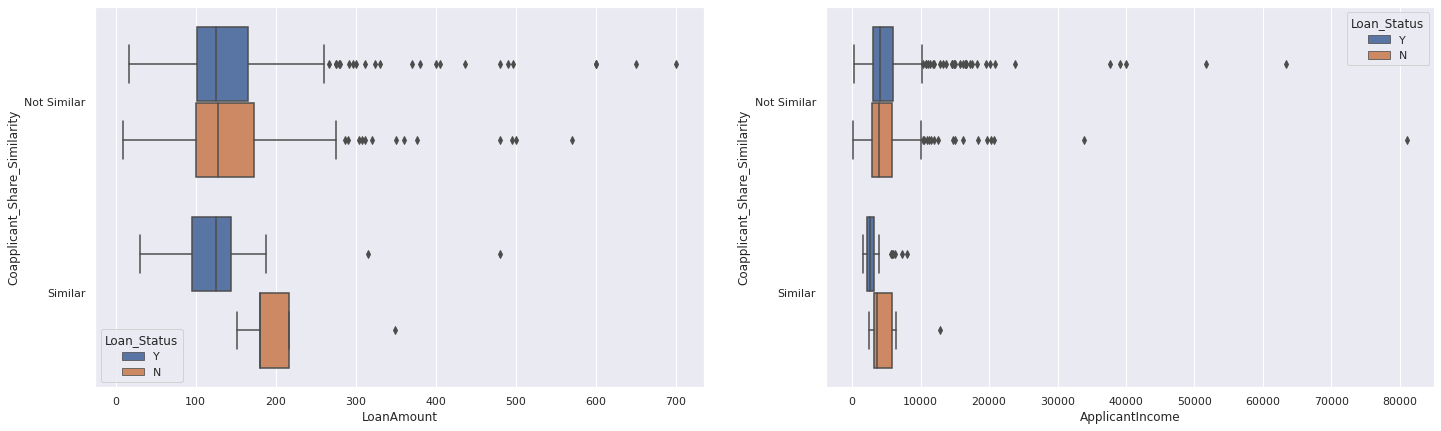

In [71]:
cat_cols_bp(df,'Coapplicant_Share_Similarity')

In [77]:
def fill_gender(cols):
    gender = cols[0]
    married = cols[1]
    if pd.isnull(gender):
        if pd.isnull(married) or married == 'Yes':
            return 'Male'
        else:
            return 'Female'
    else:
        return gender

def fill_married(cols):
    gender = cols[0]
    married = cols[1]
    if pd.isnull(married):
        if pd.isnull(gender) or gender == 'Male':
            return 'Yes'
        else:
            return 'No'
    else:
        return married

def fill_loan_amount(cols):
    pa = cols[0]
    edu = cols[1]
    se = cols[2]
    la = cols[3]
    temp = df.groupby(['Property_Area','Education','Self_Employed'])['LoanAmount'].median()
    temp = temp.to_dict()
    if pd.isna(la) and (pa,edu,se) in temp:
        return temp[(pa,edu,se)]
    else:
        return la

def coaplicant_share(cols):
    x = cols[0]
    y = cols[1]
    if y == 0:
        return 'No Share'
    elif x == y :
        return 'Same Share'
    elif x > y and y >= x * 0.85 :
        return 'Lesser But Similar Share'
    elif y > x and y <= x * 1.15:
        return 'More But Similar Share'
    elif x > y :
        return 'Lesser Share'
    else:
        return 'More Share'

def coaplicant_share_similar(cols):
    x = cols[0]
    y = cols[1]
    if x == y or (x > y and y >= x * 0.85) or (y > x and y <= x * 1.15):
        return 'Similar'
    else:
        return 'Not Similar'

def pre_process(df):
    df['Gender'] = df[['Gender','Married']].apply(fill_gender,axis=1)
    df['Married'] = df[['Gender','Married']].apply(fill_married,axis=1)
    df['Dependents'] = df['Dependents'].fillna(df.Dependents.mode()[0])
    df['Self_Employed'] = df['Self_Employed'].fillna(df.Self_Employed.mode()[0])
    df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df.Loan_Amount_Term.mode()[0])
    df['Credit_History'] = df['Credit_History'].fillna(df.Credit_History.mode()[0])
    df['LoanAmount'] = df[['Property_Area','Education','Self_Employed','LoanAmount']].apply(fill_loan_amount,axis=1)
    df['Has_Coapplicant'] = df.CoapplicantIncome.map(lambda x : 'Yes' if x != 0 else 'No')
    df['Coapplicant_Share'] = df[['ApplicantIncome','CoapplicantIncome']].apply(coaplicant_share,axis=1)
    df['Coapplicant_Share_Similarity'] = df[['ApplicantIncome','CoapplicantIncome']].apply(coaplicant_share_similar,axis=1)
    df['Has_Dependents'] = df['Dependents'].map(lambda x : 'No' if str(x) == '0' else 'Yes')
    return df

In [108]:
data = pd.read_csv('train.csv')
data.head()

Loan_ID Gender Married  ... Credit_History Property_Area Loan_Status
0  LP001002   Male      No  ...            1.0         Urban           Y
1  LP001003   Male     Yes  ...            1.0         Rural           N
2  LP001005   Male     Yes  ...            1.0         Urban           Y
3  LP001006   Male     Yes  ...            1.0         Urban           Y
4  LP001008   Male      No  ...            1.0         Urban           Y

[5 rows x 13 columns]

In [109]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [110]:
data = pre_process(data)
data.head()

Loan_ID Gender  ... Coapplicant_Share_Similarity Has_Dependents
0  LP001002   Male  ...                  Not Similar             No
1  LP001003   Male  ...                  Not Similar            Yes
2  LP001005   Male  ...                  Not Similar             No
3  LP001006   Male  ...                      Similar             No
4  LP001008   Male  ...                  Not Similar             No

[5 rows x 17 columns]

In [111]:
data.isnull().sum()

Loan_ID                         0
Gender                          0
Married                         0
Dependents                      0
Education                       0
Self_Employed                   0
ApplicantIncome                 0
CoapplicantIncome               0
LoanAmount                      0
Loan_Amount_Term                0
Credit_History                  0
Property_Area                   0
Loan_Status                     0
Has_Coapplicant                 0
Coapplicant_Share               0
Coapplicant_Share_Similarity    0
Has_Dependents                  0
dtype: int64

In [155]:
temp = data.copy()
temp.head()

Loan_ID Gender  ... Coapplicant_Share_Similarity Has_Dependents
0  LP001002   Male  ...                  Not Similar             No
1  LP001003   Male  ...                  Not Similar            Yes
2  LP001005   Male  ...                  Not Similar             No
3  LP001006   Male  ...                      Similar             No
4  LP001008   Male  ...                  Not Similar             No

[5 rows x 17 columns]

In [156]:
from sklearn.preprocessing import LabelEncoder

In [157]:
temp.Loan_Status = temp.Loan_Status.apply(lambda x : 1 if x == 'Y' else 0)
cols = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area', 
            'Has_Coapplicant','Coapplicant_Share', 'Coapplicant_Share_Similarity','Has_Dependents']
enc = LabelEncoder()

for col in cols:
    temp[col] = enc.fit_transform(temp[col])

temp.head()

Loan_ID  Gender  ...  Coapplicant_Share_Similarity  Has_Dependents
0  LP001002       1  ...                             0               0
1  LP001003       1  ...                             0               1
2  LP001005       1  ...                             0               0
3  LP001006       1  ...                             1               0
4  LP001008       1  ...                             0               0

[5 rows x 17 columns]

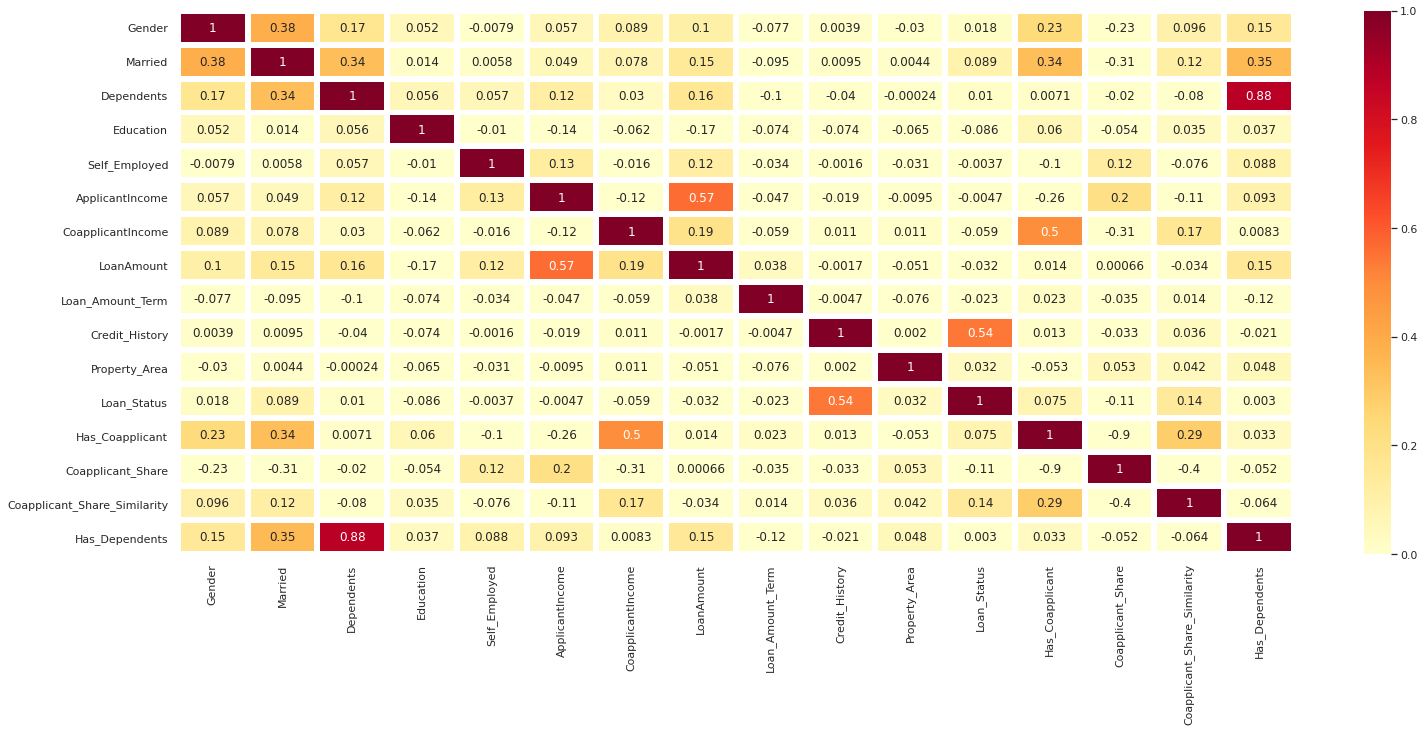

In [158]:
plt.figure(figsize=(25,10))
sns.heatmap(temp.corr(),cmap='YlOrRd',vmin=0,vmax=1,annot=True,lw=5)

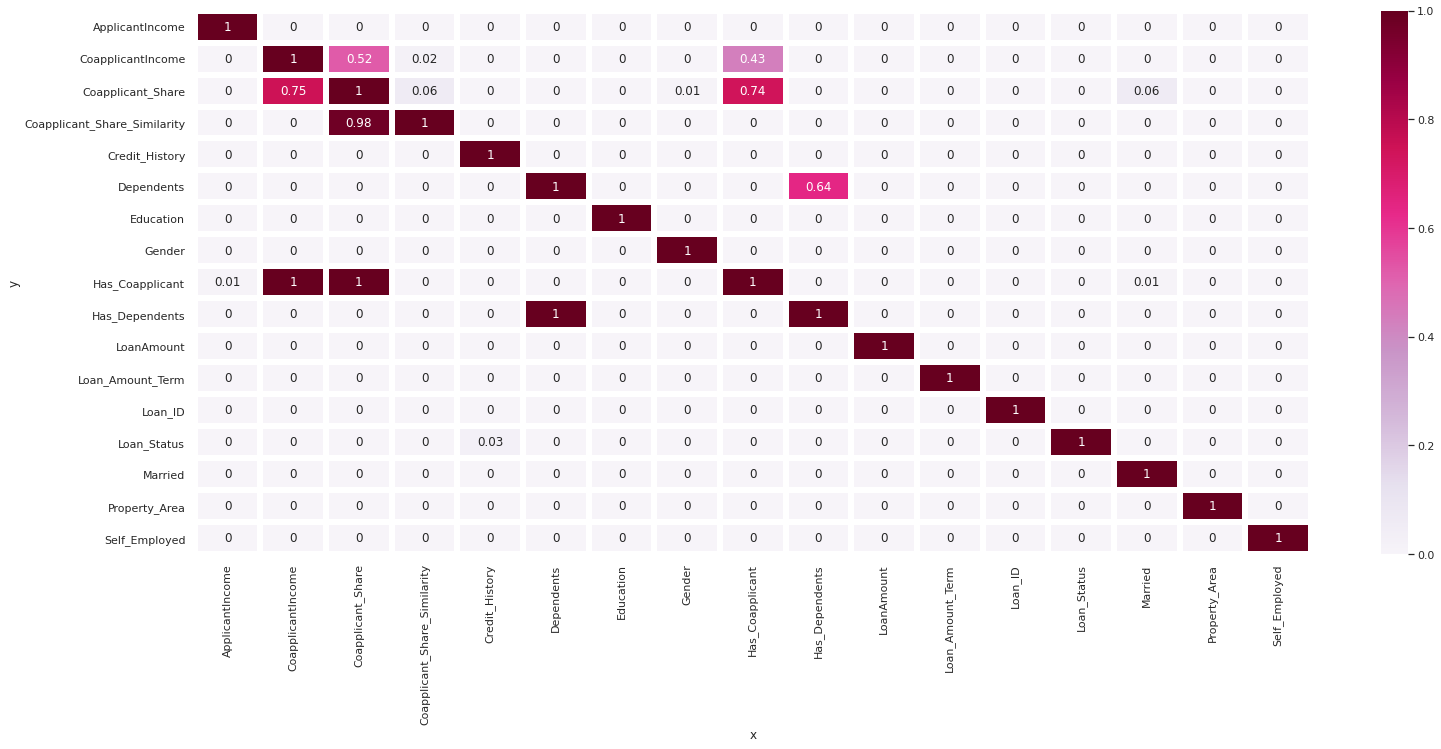

In [159]:
plt.figure(figsize=(25,10))
matrix_df = pps.matrix(temp)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
matrix_df = matrix_df.apply(lambda x: round(x, 2))
sns.heatmap(matrix_df,cmap='PuRd',vmin=0,vmax=1,annot=True,lw=5)

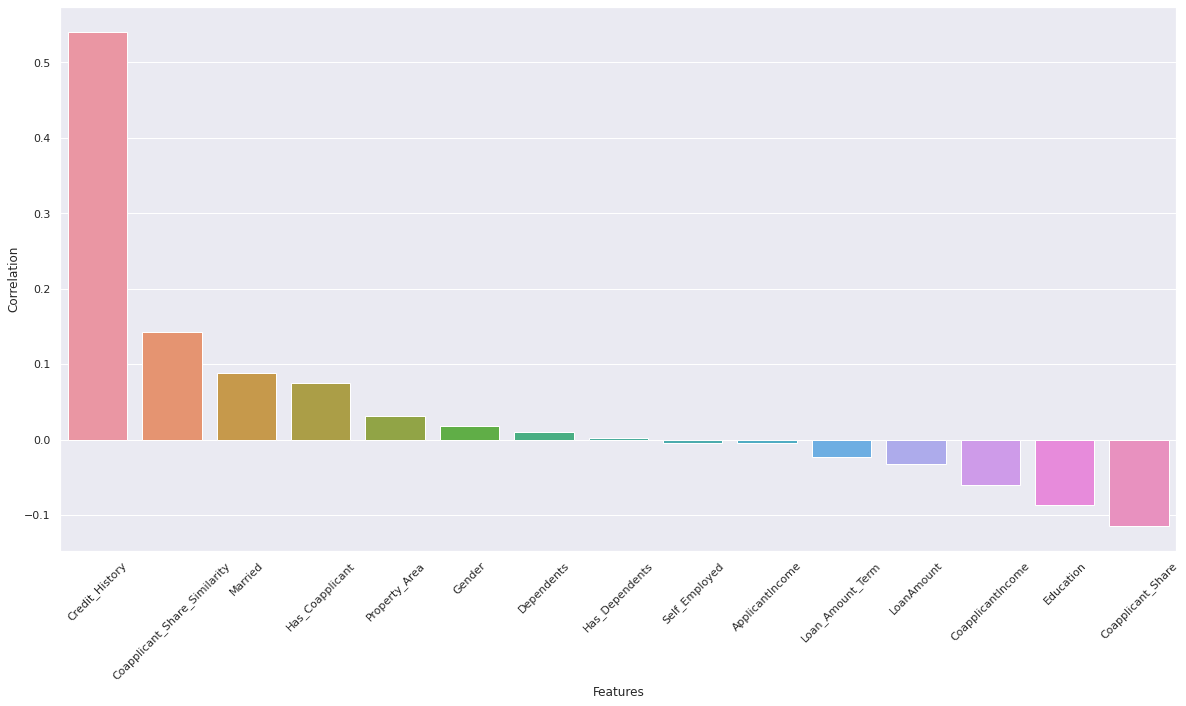

In [160]:
loan_status_corr = pd.DataFrame()
loan_status_corr['Features'] = pd.Series(temp.corr().loc['Loan_Status'].index)
loan_status_corr['Correlation'] = pd.Series(temp.corr().loc['Loan_Status'].values)
loan_status_corr = loan_status_corr[loan_status_corr.Features != 'Loan_Status']
loan_status_corr = loan_status_corr.sort_values('Correlation',ascending=False).reset_index(drop=True)
plt.figure(figsize=(20,10))
ax = sns.barplot(x=loan_status_corr.Features,y=loan_status_corr.Correlation)
plt.setp(ax.get_xticklabels(), rotation=45);

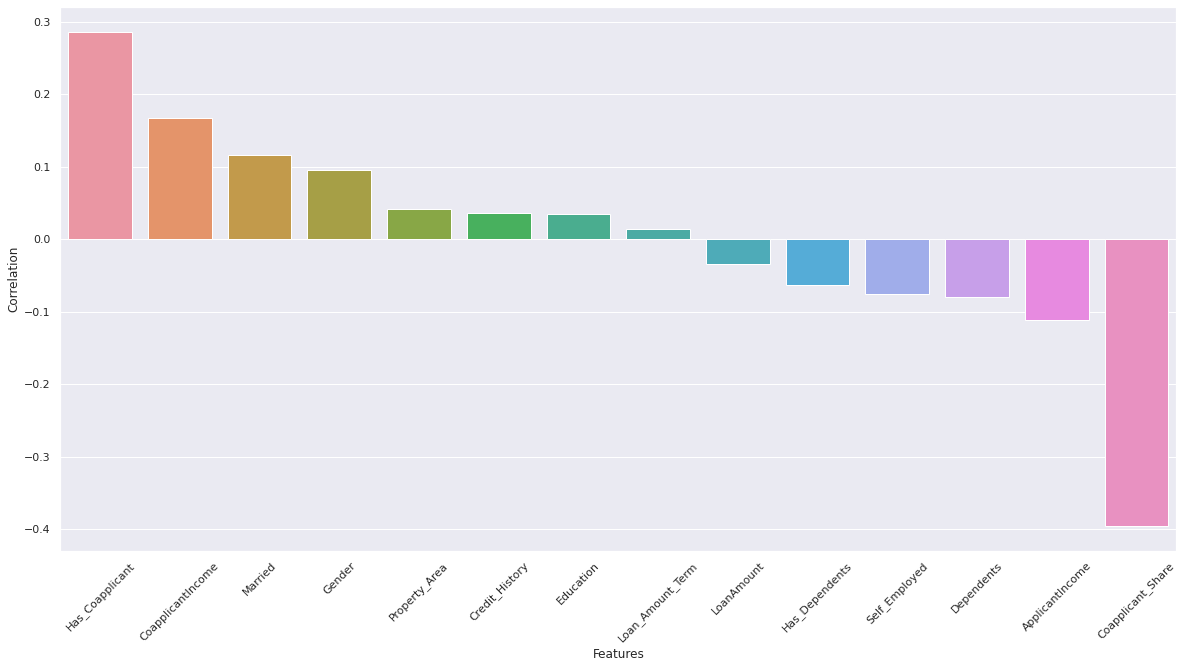

In [161]:
capp_corr = pd.DataFrame()
capp_corr['Features'] = pd.Series(temp.corr().loc['Coapplicant_Share_Similarity'].index)
capp_corr['Correlation'] = pd.Series(temp.corr().loc['Coapplicant_Share_Similarity'].values)
capp_corr = capp_corr[(capp_corr.Features != 'Coapplicant_Share_Similarity') & (capp_corr.Features != 'Loan_Status')]
capp_corr = capp_corr.sort_values('Correlation',ascending=False).reset_index(drop=True)
plt.figure(figsize=(20,10))
ax = sns.barplot(x=capp_corr.Features,y=capp_corr.Correlation)
plt.setp(ax.get_xticklabels(), rotation=45);

In [165]:
def encode(df):
    cols = ['Gender', 'Married', 'Education','Self_Employed','Property_Area', 
            'Coapplicant_Share_Similarity','Has_Dependents']
    df.Loan_Status = df.Loan_Status.apply(lambda x : 1 if x == 'Y' else 0)
    df.Married = df.Married.apply(lambda x : 'Married' if x == 'Yes' else 'Not Married')
    df.Self_Employed = df.Self_Employed.apply(lambda x : 'Self Employed' if x == 'Yes' else 'Not Self Employed')
    df.Has_Dependents = df.Has_Dependents.apply(lambda x : 'Has Dependents' if x == 'Yes' else 'No Dependents')
    df = df.drop(['Loan_ID','Coapplicant_Share','Has_Coapplicant','Dependents'],axis=1)
    for col in cols :
        temp = pd.get_dummies(df[col],drop_first=True)
        df = pd.concat([df,temp],axis=1)
    df = df.drop(cols,axis=1)
    return df

In [194]:
temp = data.copy()
temp.head()

Loan_ID Gender  ... Coapplicant_Share_Similarity Has_Dependents
0  LP001002   Male  ...                  Not Similar             No
1  LP001003   Male  ...                  Not Similar            Yes
2  LP001005   Male  ...                  Not Similar             No
3  LP001006   Male  ...                      Similar             No
4  LP001008   Male  ...                  Not Similar             No

[5 rows x 17 columns]

In [195]:
temp = encode(temp)
temp.head()

ApplicantIncome  CoapplicantIncome  ...  Similar  No Dependents
0             5849                0.0  ...        0              1
1             4583             1508.0  ...        0              0
2             3000                0.0  ...        0              1
3             2583             2358.0  ...        1              1
4             6000                0.0  ...        0              1

[5 rows x 14 columns]

In [197]:
def remove_outliers(df,q=0.99):
    df = df[df.ApplicantIncome < df.ApplicantIncome.quantile(q)]
    df = df[df.CoapplicantIncome < df.CoapplicantIncome.quantile(q)]
    df = df[df.LoanAmount < df.LoanAmount.quantile(q)]
    return df

In [192]:
temp.describe()

ApplicantIncome  CoapplicantIncome  ...     Similar  No Dependents
count       614.000000         614.000000  ...  614.000000     614.000000
mean       5403.459283        1621.245798  ...    0.092834       0.586319
std        6109.041673        2926.248369  ...    0.290436       0.492894
min         150.000000           0.000000  ...    0.000000       0.000000
25%        2877.500000           0.000000  ...    0.000000       0.000000
50%        3812.500000        1188.500000  ...    0.000000       1.000000
75%        5795.000000        2297.250000  ...    0.000000       1.000000
max       81000.000000       41667.000000  ...    1.000000       1.000000

[8 rows x 14 columns]

In [193]:
temp = remove_outliers(temp)
temp.describe()

ApplicantIncome  CoapplicantIncome  ...     Similar  No Dependents
count       592.000000         592.000000  ...  592.000000     592.000000
mean       4738.750000        1393.317432  ...    0.092905       0.592905
std        3128.292385        1623.570407  ...    0.290545       0.491708
min         150.000000           0.000000  ...    0.000000       0.000000
25%        2875.750000           0.000000  ...    0.000000       0.000000
50%        3750.000000        1188.500000  ...    0.000000       1.000000
75%        5653.500000        2250.000000  ...    0.000000       1.000000
max       23803.000000        8333.000000  ...    1.000000       1.000000

[8 rows x 14 columns]